<a href="https://colab.research.google.com/github/EngSoftwareEngineer/GNN/blob/main/GNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

link github for data of Tessaloniki:https://github.com/nikgeokar/residual_neural_networks_parking_violation_prediction/tree/main/Data

In this notebook I create a dataframe with 19 points of interest of Thessaloniki

In [2]:
!git clone https://github.com/nikgeokar/residual_neural_networks_parking_violation_prediction.git

# حالا می‌توانید فایل‌های موجود در مخزن را بررسی کنید:
!ls residual_neural_networks_parking_violation_prediction/Data

Cloning into 'residual_neural_networks_parking_violation_prediction'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 82 (delta 16), reused 45 (delta 3), pack-reused 0
Receiving objects: 100% (82/82), 8.11 MiB | 17.05 MiB/s, done.
Resolving deltas: 100% (16/16), done.
Holidays.txt  OpenWheather  Parkink_Slot_Proccesed.csv	Points_of_Interest.txt	Scan_Data2.csv


In [3]:
# Basic Analysis and Visualization
import pandas as pd
from geopy.geocoders import Nominatim
import geopy.distance
import folium
Project_Path='Local Path'


The file 'Points_of_Interest.txt' contains the names of 19 points of interest as well as their addresses. For some points there was no clear address so I put their coordinates. I am loading the file 'Points_of_Interest.txt' into the Dataframe 'Points_Of_Interest'.



In [4]:
Points_Of_Interest=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Points_of_Interest.txt',sep='-',names=['Point','Adress'])
Point_Adresses = Points_Of_Interest['Adress'].values.tolist()
Point_Names = Points_Of_Interest['Point'].values.tolist()

With the help of geopy I use the addresses and find the coordinates of 19 points. I then create and save the DataFrame 'Sights.csv', which contains the names and coordinates.



In [5]:
Sights_List=[]
for i in range (0,len(Point_Adresses)):
    address=Point_Adresses[i]
    geolocator = Nominatim(user_agent="Skg_Point_Of_Iterest")
    location = geolocator.geocode(address)
    Sights_List.append([Point_Names[i],location.latitude,location.longitude])

Sights = pd.DataFrame (Sights_List, columns = ['Sight','Sight_Latitude','Sight_Longitude'])
Sights.to_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Sights.csv')
Sights


,Sight,Sight_Latitude,Sight_Longitude
0,Γενικό Νοσοκομείο Θεσσαλονίκης «Γ. Γεννηματάς»,40.634060,22.955441
1,Λιμάνι,40.632952,22.935581
2,Δημαρχείο Θεσσαλονίκης,40.623490,22.953888
3,Λευκός Πύργος,40.626591,22.948332
4,Αγορά Καπάνι,40.635934,22.942649
5,Λαδάδικα,40.635470,22.936051
6,Πλατεία Άθωνος,40.634906,22.944226
7,Πλατεία Αριστοτέλους,40.632338,22.940902
8,Ροτόντα,40.633220,22.952826
9,Πλατεία Αγίας Σοφίας,40.633686,22.945700


I use folium to print a map of the city showing the Points Of Interest, Each circle corresponds to a Sight. If you select a circle the name from that particular Sight will appear.



In [6]:
Map_Points_Of_Interest = folium.Map([40.632778, 22.946944],tiles="OpenStreetMap", zoom_start=15)
for i in range(0,len(Sights_List)):
    folium.CircleMarker(location= [Sights_List[i][1],Sights_List[i][2]],
                        radius=4,
                        popup=Sights_List[i][1],
                        fill_color='blue', color = 'blue', fill_opacity=0.7
                       ).add_to(Map_Points_Of_Interest)
Map_Points_Of_Interest

I create the lists 'SlotName_Lat_Long' and 'Sight_Name_Lat_Long' where they have the names and coordinates of the Sector and the Sights respectively.



In [7]:
Sight_Name=Sights['Sight'].values.tolist()
Sight_Lat=Sights['Sight_Latitude'].values.tolist()
Sight_Long=Sights['Sight_Longitude'].values.tolist()
Sight_Name_Lat_Long=[[Sight_Name],Sight_Lat,Sight_Long]
Sights

,Sight,Sight_Latitude,Sight_Longitude
0,Γενικό Νοσοκομείο Θεσσαλονίκης «Γ. Γεννηματάς»,40.634060,22.955441
1,Λιμάνι,40.632952,22.935581
2,Δημαρχείο Θεσσαλονίκης,40.623490,22.953888
3,Λευκός Πύργος,40.626591,22.948332
4,Αγορά Καπάνι,40.635934,22.942649
5,Λαδάδικα,40.635470,22.936051
6,Πλατεία Άθωνος,40.634906,22.944226
7,Πλατεία Αριστοτέλους,40.632338,22.940902
8,Ροτόντα,40.633220,22.952826
9,Πλατεία Αγίας Σοφίας,40.633686,22.945700


In [8]:
Column_Names=['Slot_id','Adress','Mean','Start','End','Capacity','Full_adress','Latitude','Longitude']
Parking_Slots=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Parkink_Slot_Proccesed.csv',sep=',', names=Column_Names)
Latitude= Parking_Slots['Latitude'].values.tolist()
Longitude=Parking_Slots['Longitude'].values.tolist()
Slot_Id=Parking_Slots['Slot_id'].values.tolist()

In [9]:
Ds=[]
Distance=[]

for j in range(0,len(Latitude)):
    Ds=[]
    for i in range (0,len(Sight_Lat)):
        d= geopy.distance.geodesic((Latitude[j],Longitude[j]), (Sight_Lat[i],Sight_Long[i])).m
        Ds.append(int(d))
    Distance.append(Ds)
Distance_Data=pd.DataFrame(Distance,columns=Sight_Name)
Distance_Data.insert (0, "Slot_id", Slot_Id)
Distance_Data.to_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance.csv')
Distance_Data


,Slot_id,Γενικό Νοσοκομείο Θεσσαλονίκης «Γ. Γεννηματάς»,Λιμάνι,Δημαρχείο Θεσσαλονίκης,Λευκός Πύργος,Αγορά Καπάνι,Λαδάδικα,Πλατεία Άθωνος,Πλατεία Αριστοτέλους,Ροτόντα,Πλατεία Αγίας Σοφίας,Πλατεία Αντιγονιδών,Μουσείο Μακεδονικού Αγώνα,Πλατεία Ναυαρίνου,Πάρκο ΧΑΝΘ,Ιερός Ναός Αγίου Δημητρίου,ΔΕΘ,ΑΠΘ,Άγαλμα Ελευθερίου Βενιζέλου,Ρωμαϊκή Αγορά Θεσσαλονίκης
0,17182,812,1610,397,392,1320,1711,1147,1178,691,963,1835,896,542,183,1473,246,551,1335,1404
1,17361,703,1581,503,431,1249,1664,1074,1139,581,890,1755,861,474,263,1378,220,445,1263,1311
2,17622,595,1557,610,491,1183,1623,1007,1108,473,825,1678,838,424,358,1285,249,345,1195,1220
3,18022,483,1539,724,569,1120,1585,945,1085,360,766,1600,828,395,465,1191,320,248,1130,1128
4,18282,1107,684,1213,635,582,798,475,260,867,396,1106,46,478,836,979,1113,1048,606,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,245,52,1711,1141,1007,1140,1682,988,1268,255,853,1509,1075,678,921,1021,659,234,1140,983
392,248,947,2143,533,924,1782,2224,1607,1701,965,1426,2262,1424,1026,693,1835,354,693,1793,1777
393,249,978,2023,358,773,1708,2121,1533,1591,951,1349,2207,1309,936,540,1805,296,707,1721,1742
394,250,1061,1825,119,540,1593,1951,1422,1413,968,1239,2115,1130,820,318,1761,376,787,1609,1692


In [10]:
Ds=[]
Distance=[]

for j in range(0,len(Latitude)):
    Ds=[]
    for i in range (0,len(Latitude)):
        d= geopy.distance.geodesic((Latitude[j],Longitude[j]), (Latitude[i],Longitude[i])).m
        Ds.append(int(d))
    Distance.append(Ds)
Distance_Data1=pd.DataFrame(Distance,columns=Slot_Id)
Distance_Data1.insert (0, "Slot_id", Slot_Id)
Distance_Data1.to_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')
Distance_Data1


,Slot_id,17182,17361,17622,18022,18282,18094,18362,18224,18512,...,239,240,241,242,244,245,248,249,250,251
0,17182,0,110,220,335,927,921,912,908,904,...,632,808,804,894,597,779,543,413,288,361
1,17361,110,0,109,224,896,891,873,870,859,...,525,697,693,783,487,670,562,461,390,416
2,17622,220,109,0,115,877,872,846,844,826,...,421,588,584,674,378,565,603,528,495,491
3,18022,335,224,115,0,870,865,831,830,804,...,315,472,468,558,266,456,664,614,608,583
4,18282,927,896,877,870,0,5,69,62,121,...,779,983,984,1069,977,1121,1459,1340,1155,1288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,245,779,670,565,456,1121,1118,1063,1065,1020,...,342,182,178,183,192,0,896,930,1021,922
392,248,543,562,603,664,1459,1453,1436,1433,1421,...,957,1022,1017,1071,797,896,0,177,462,229
393,249,413,461,528,614,1340,1335,1324,1320,1314,...,926,1030,1025,1093,800,930,177,0,285,57
394,250,288,390,495,608,1155,1149,1151,1145,1151,...,916,1076,1072,1156,854,1021,462,285,0,233


In [11]:
!pip install geopy

In [12]:
import folium
import pandas as pd

# خواندن داده‌های پارکینگ
Column_Names=['Slot_id','Adress','Mean','Start','End','Capacity','Full_adress','Latitude','Longitude']
Parking_Slots = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Parkink_Slot_Proccesed.csv', sep=',', names=Column_Names)

# استخراج اطلاعات از دیتافریم
Latitude = Parking_Slots['Latitude'].values.tolist()
Longitude = Parking_Slots['Longitude'].values.tolist()
Slot_Id = Parking_Slots['Slot_id'].values.tolist()

# ایجاد نقشه
Map_Points_Of_Interest = folium.Map([40.632778, 22.946944], tiles="OpenStreetMap", zoom_start=15)

# اضافه کردن مکان‌های پارکینگ به نقشه
for i in range(len(Slot_Id)):
    folium.Marker(
        location=[Latitude[i], Longitude[i]],
        popup=f'Slot ID: {Slot_Id[i]}',
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(Map_Points_Of_Interest)

# نمایش نقشه
Map_Points_Of_Interest


In this Notebook I convert the data of the scans I created in the Scans_Data_Processing file to be suitable for training



In [13]:
#Data Proccesing
import pandas as pd
import numpy as np
from tqdm import tqdm
from datetime import timedelta
Project_Path='Local Path'

I load the Scans_Data2 file I created into the Scans_Data_Processing notebook



In [14]:
Scans_Data=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data2.csv',low_memory=False,sep=',',index_col=0)
Scans_Data


,Date,Day Name,Day,Mouth,Year,Time,Latitude,Longitude,Zone,Slot_id,Legal,Covid,Lockdown
0,2018-01-03,Wednesday,3,1,2018,15:25,40.629133,22.953210,A,17622,1,0,0
1,2018-01-03,Wednesday,3,1,2018,15:06,40.629035,22.947317,A,17813,1,0,0
2,2018-01-03,Wednesday,3,1,2018,15:07,40.628861,22.947690,A,17813,0,0,0
3,2018-01-03,Wednesday,3,1,2018,15:07,40.629031,22.947298,A,17813,1,0,0
4,2018-01-03,Wednesday,3,1,2018,15:07,40.628900,22.947709,A,17813,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2018-01-04,Thursday,4,1,2018,12:21,40.629312,22.951746,A,17644,1,0,0
996,2018-01-04,Thursday,4,1,2018,12:48,40.636055,22.945928,A,20548,1,0,0
997,2018-01-04,Thursday,4,1,2018,15:24,40.626885,22.952857,A,17182,0,0,0
998,2018-01-04,Thursday,4,1,2018,12:48,40.636424,22.946217,A,20548,1,0,0


I am converting the format of the "Date" column from "Year/Month/Day" to "Month/Day/Year" so that it has the appropriate format so that I can then convert it to pandas datetime



In [15]:
Date_List=[]
Scans_List=Scans_Data.values.tolist()
for i in tqdm(range(0,len(Scans_List))):
    Date = Scans_List[i][0]
    y,m,d = Date.split('-')
    D=m + '/' + d + '/' +y
    Date_List.append(D)
Scans_Data=Scans_Data.drop(['Date'], axis=1)
Scans_Data.insert(1, "Date", Date_List, True)
Scans_Data

100%|██████████| 1000/1000 [00:00<00:00, 429832.34it/s]


,Day Name,Date,Day,Mouth,Year,Time,Latitude,Longitude,Zone,Slot_id,Legal,Covid,Lockdown
0,Wednesday,01/03/2018,3,1,2018,15:25,40.629133,22.953210,A,17622,1,0,0
1,Wednesday,01/03/2018,3,1,2018,15:06,40.629035,22.947317,A,17813,1,0,0
2,Wednesday,01/03/2018,3,1,2018,15:07,40.628861,22.947690,A,17813,0,0,0
3,Wednesday,01/03/2018,3,1,2018,15:07,40.629031,22.947298,A,17813,1,0,0
4,Wednesday,01/03/2018,3,1,2018,15:07,40.628900,22.947709,A,17813,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Thursday,01/04/2018,4,1,2018,12:21,40.629312,22.951746,A,17644,1,0,0
996,Thursday,01/04/2018,4,1,2018,12:48,40.636055,22.945928,A,20548,1,0,0
997,Thursday,01/04/2018,4,1,2018,15:24,40.626885,22.952857,A,17182,0,0,0
998,Thursday,01/04/2018,4,1,2018,12:48,40.636424,22.946217,A,20548,1,0,0


Μετατρέπω τις στήλες 'Date' και 'Time' σε pandas datetime ώστε να μετατρέψω την ώρα σε time-int (Seconds)



In [16]:
Scans_Data['Date_Time'] = Scans_Data['Date'].map(str)+ ' ' + Scans_Data['Time'].map(str)
Scans_Data['Date_Time'] = pd.to_datetime(Scans_Data['Date_Time'])
Scans_Data['Time_Int'] = (Scans_Data['Date_Time']-Scans_Data['Date_Time'].dt.normalize()).dt.total_seconds()
Scans_Data=Scans_Data.drop(['Time'], axis=1)
Scans_Data=Scans_Data.drop(['Date_Time'], axis=1)
Scans_Data

,Day Name,Date,Day,Mouth,Year,Latitude,Longitude,Zone,Slot_id,Legal,Covid,Lockdown,Time_Int
0,Wednesday,01/03/2018,3,1,2018,40.629133,22.953210,A,17622,1,0,0,55500.0
1,Wednesday,01/03/2018,3,1,2018,40.629035,22.947317,A,17813,1,0,0,54360.0
2,Wednesday,01/03/2018,3,1,2018,40.628861,22.947690,A,17813,0,0,0,54420.0
3,Wednesday,01/03/2018,3,1,2018,40.629031,22.947298,A,17813,1,0,0,54420.0
4,Wednesday,01/03/2018,3,1,2018,40.628900,22.947709,A,17813,1,0,0,54420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Thursday,01/04/2018,4,1,2018,40.629312,22.951746,A,17644,1,0,0,44460.0
996,Thursday,01/04/2018,4,1,2018,40.636055,22.945928,A,20548,1,0,0,46080.0
997,Thursday,01/04/2018,4,1,2018,40.626885,22.952857,A,17182,0,0,0,55440.0
998,Thursday,01/04/2018,4,1,2018,40.636424,22.946217,A,20548,1,0,0,46080.0


Knowing from the previous notebook what are the times when I have recorded scans (6:00, 7:00,..., 19:00, 20:00) I give their imprint in seconds, for example (6:00 = 21600) and then I capture her with their center. eg (6:00 -> 6:30) and therefore (21600->23400). So I ended up with a list of 15 hours that will be used to sort the scans into time slots



In [17]:
Time_Slots=[21600,25200,28800,32400,36000,39600,43200,46800,50400,54000,57600,61200,64800,68400,72000]
Time_SlotsCenter=[]
for i in range (0,len(Time_Slots)):
    Time_SlotsCenter.append(Time_Slots[i]+1800)
Time_Slots=Time_SlotsCenter
Time_Slots

[23400,
 27000,
 30600,
 34200,
 37800,
 41400,
 45000,
 48600,
 52200,
 55800,
 59400,
 63000,
 66600,
 70200,
 73800]

According to the above list I classified each scan in the time-slot that was closest. That is, a scan that was done at 12:45 went to the time-slot '12:00-13:00' which is captured as 12:00. That is, I added the Time_Slot column. I also added the Time_Distance column which states how far in seconds the pre-wedding time of the scan is from the center of the timeslot we ranked the scan. I use Time_Distance to check for ranking errors.



In [18]:
Scan_List=Scans_Data.values.tolist()
Real_Time_Slots=[]
Time_Distance=[]
for i in tqdm(range(0,len(Scan_List))):
    Real_Time=Scan_List[i][12]
    Distances=[]
    Slots=[]

    for j in range (0,len(Time_Slots)):
        Distances.append(abs(Time_Slots[j]-Real_Time))

    Slots=np.column_stack((Time_Slots, Distances))
    Slots = sorted(Slots, key=lambda x: x[1])
    Real_Time_Slots.append(Slots[0][0])
    Time_Distance.append(Slots[0][1])
Scans_Data.insert(13, "Time_Slot", Real_Time_Slots, True)
Scans_Data.insert(14, "Time_Distance", Time_Distance, True)
Scans_Data

100%|██████████| 1000/1000 [00:00<00:00, 31260.42it/s]


,Day Name,Date,Day,Mouth,Year,Latitude,Longitude,Zone,Slot_id,Legal,Covid,Lockdown,Time_Int,Time_Slot,Time_Distance
0,Wednesday,01/03/2018,3,1,2018,40.629133,22.953210,A,17622,1,0,0,55500.0,55800.0,300.0
1,Wednesday,01/03/2018,3,1,2018,40.629035,22.947317,A,17813,1,0,0,54360.0,55800.0,1440.0
2,Wednesday,01/03/2018,3,1,2018,40.628861,22.947690,A,17813,0,0,0,54420.0,55800.0,1380.0
3,Wednesday,01/03/2018,3,1,2018,40.629031,22.947298,A,17813,1,0,0,54420.0,55800.0,1380.0
4,Wednesday,01/03/2018,3,1,2018,40.628900,22.947709,A,17813,1,0,0,54420.0,55800.0,1380.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Thursday,01/04/2018,4,1,2018,40.629312,22.951746,A,17644,1,0,0,44460.0,45000.0,540.0
996,Thursday,01/04/2018,4,1,2018,40.636055,22.945928,A,20548,1,0,0,46080.0,45000.0,1080.0
997,Thursday,01/04/2018,4,1,2018,40.626885,22.952857,A,17182,0,0,0,55440.0,55800.0,360.0
998,Thursday,01/04/2018,4,1,2018,40.636424,22.946217,A,20548,1,0,0,46080.0,45000.0,1080.0


I deleted the scans done during the lock down period. I explain in the report why I did this



In [19]:
Scans_Data.drop(Scans_Data.index[Scans_Data['Lockdown'] == 1], inplace=True)
Scans_Data=Scans_Data.reset_index()
del Scans_Data["index"]
Scans_Data

,Day Name,Date,Day,Mouth,Year,Latitude,Longitude,Zone,Slot_id,Legal,Covid,Lockdown,Time_Int,Time_Slot,Time_Distance
0,Wednesday,01/03/2018,3,1,2018,40.629133,22.953210,A,17622,1,0,0,55500.0,55800.0,300.0
1,Wednesday,01/03/2018,3,1,2018,40.629035,22.947317,A,17813,1,0,0,54360.0,55800.0,1440.0
2,Wednesday,01/03/2018,3,1,2018,40.628861,22.947690,A,17813,0,0,0,54420.0,55800.0,1380.0
3,Wednesday,01/03/2018,3,1,2018,40.629031,22.947298,A,17813,1,0,0,54420.0,55800.0,1380.0
4,Wednesday,01/03/2018,3,1,2018,40.628900,22.947709,A,17813,1,0,0,54420.0,55800.0,1380.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Thursday,01/04/2018,4,1,2018,40.629312,22.951746,A,17644,1,0,0,44460.0,45000.0,540.0
996,Thursday,01/04/2018,4,1,2018,40.636055,22.945928,A,20548,1,0,0,46080.0,45000.0,1080.0
997,Thursday,01/04/2018,4,1,2018,40.626885,22.952857,A,17182,0,0,0,55440.0,55800.0,360.0
998,Thursday,01/04/2018,4,1,2018,40.636424,22.946217,A,20548,1,0,0,46080.0,45000.0,1080.0


I keep only the columns I need.



In [20]:
Scans_Data2=Scans_Data['Slot_id'],Scans_Data['Date'],Scans_Data['Day Name'], Scans_Data['Time_Int'], Scans_Data['Time_Slot'],Scans_Data['Covid'],Scans_Data['Legal']
#,Scans_Data['Latitude'],Scans_Data['Longitude']
Headers=['Slot_id','Date','Day Name','Time_Int','Time_Slot','Covid','Legal']
Scans_Data2 = pd.concat(Scans_Data2, axis=1, keys=Headers)
Scans_Data2

,Slot_id,Date,Day Name,Time_Int,Time_Slot,Covid,Legal
0,17622,01/03/2018,Wednesday,55500.0,55800.0,0,1
1,17813,01/03/2018,Wednesday,54360.0,55800.0,0,1
2,17813,01/03/2018,Wednesday,54420.0,55800.0,0,0
3,17813,01/03/2018,Wednesday,54420.0,55800.0,0,1
4,17813,01/03/2018,Wednesday,54420.0,55800.0,0,1
...,...,...,...,...,...,...,...
995,17644,01/04/2018,Thursday,44460.0,45000.0,0,1
996,20548,01/04/2018,Thursday,46080.0,45000.0,0,1
997,17182,01/04/2018,Thursday,55440.0,55800.0,0,0
998,20548,01/04/2018,Thursday,46080.0,45000.0,0,1


I convert the Legal column to categorical to then do one-hot encoding. (This step is unnecessary)



In [21]:
Scans_Data2['Legal'] = Scans_Data2['Legal'].replace(1, 'Legal')
Scans_Data2['Legal'] = Scans_Data2['Legal'].replace(0, 'Ilegal')
Scans_Data2

,Slot_id,Date,Day Name,Time_Int,Time_Slot,Covid,Legal
0,17622,01/03/2018,Wednesday,55500.0,55800.0,0,Legal
1,17813,01/03/2018,Wednesday,54360.0,55800.0,0,Legal
2,17813,01/03/2018,Wednesday,54420.0,55800.0,0,Ilegal
3,17813,01/03/2018,Wednesday,54420.0,55800.0,0,Legal
4,17813,01/03/2018,Wednesday,54420.0,55800.0,0,Legal
...,...,...,...,...,...,...,...
995,17644,01/04/2018,Thursday,44460.0,45000.0,0,Legal
996,20548,01/04/2018,Thursday,46080.0,45000.0,0,Legal
997,17182,01/04/2018,Thursday,55440.0,55800.0,0,Ilegal
998,20548,01/04/2018,Thursday,46080.0,45000.0,0,Legal


I do one hot encoding of the legal column, create 2 new columns through this process and delete the legal column. Then I save the dataframe to have this point as a check-point



In [22]:
# creating initial dataframe
Legality_Types = ('Legal','Ilegal')
Legaldf = pd.DataFrame(Scans_Data2, columns=['Legal'])
# generate binary values using get_dummies
Legality = pd.get_dummies(Legaldf, columns=["Legal"], prefix=["Legality"] )
# merge with main df bridge_df on key values
Scans_Data2 = Scans_Data2.join(Legality)
Scans_Data2=Scans_Data2.drop(['Legal'], axis=1)
Scans_Data2.to_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.1.csv')
Scans_Data2

,Slot_id,Date,Day Name,Time_Int,Time_Slot,Covid,Legality_Ilegal,Legality_Legal
0,17622,01/03/2018,Wednesday,55500.0,55800.0,0,False,True
1,17813,01/03/2018,Wednesday,54360.0,55800.0,0,False,True
2,17813,01/03/2018,Wednesday,54420.0,55800.0,0,True,False
3,17813,01/03/2018,Wednesday,54420.0,55800.0,0,False,True
4,17813,01/03/2018,Wednesday,54420.0,55800.0,0,False,True
...,...,...,...,...,...,...,...,...
995,17644,01/04/2018,Thursday,44460.0,45000.0,0,False,True
996,20548,01/04/2018,Thursday,46080.0,45000.0,0,False,True
997,17182,01/04/2018,Thursday,55440.0,55800.0,0,True,False
998,20548,01/04/2018,Thursday,46080.0,45000.0,0,False,True


I convert some of the columns into a string that will be used as a key. I leave out the column specifying the actual time of each scan and the columns specifying the parking violation. The key contains information about the time domain, the time-slot. So samples with the same key are scans made on the same day in the same time-slot in the same sector



In [23]:
Scans_Data2=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.1.csv',low_memory=False,sep=',',index_col=0)
Scans_Data2['Key'] = Scans_Data2['Slot_id'].map(str)+ '+' +Scans_Data2['Date'].map(str) + '+' + Scans_Data2['Day Name'].map(str)+ '+' + Scans_Data2['Time_Slot'].map(str)+ '+'+Scans_Data2['Covid'].map(str)
#+'+'+Scans_Data2['Latitude'].map(str)+'+'+Scans_Data2['Longitude'].map(str)
Scans_Data2=Scans_Data2['Key'],Scans_Data2['Time_Int'],Scans_Data2['Legality_Ilegal'],Scans_Data2['Legality_Legal']
Headers=['Key','Time_Int','Legality_Ilegal','Legality_Legal']
Scans_Data2 = pd.concat(Scans_Data2, axis=1, keys=Headers)
Scans_Data2

,Key,Time_Int,Legality_Ilegal,Legality_Legal
0,17622+01/03/2018+Wednesday+55800.0+0,55500.0,False,True
1,17813+01/03/2018+Wednesday+55800.0+0,54360.0,False,True
2,17813+01/03/2018+Wednesday+55800.0+0,54420.0,True,False
3,17813+01/03/2018+Wednesday+55800.0+0,54420.0,False,True
4,17813+01/03/2018+Wednesday+55800.0+0,54420.0,False,True
...,...,...,...,...
995,17644+01/04/2018+Thursday+45000.0+0,44460.0,False,True
996,20548+01/04/2018+Thursday+45000.0+0,46080.0,False,True
997,17182+01/04/2018+Thursday+55800.0+0,55440.0,True,False
998,20548+01/04/2018+Thursday+45000.0+0,46080.0,False,True


I group by and for each different key I calculate the average time of the scans, the scans that showed illegality and the scans that showed legitimacy. Essentially with this process I collect the scans to create the controls, a control consists of scans done on the same day in the same time-slot in the same sector



In [24]:
Time_Int = Scans_Data2.groupby(["Key"]).Time_Int.mean().reset_index()
ILegal_Sum = Scans_Data2.groupby(["Key"]).Legality_Ilegal.sum().reset_index()
Legal_Sum= Scans_Data2.groupby(["Key"]).Legality_Legal.sum().reset_index()
Legal_Sum=Legal_Sum['Key'],Time_Int['Time_Int'],ILegal_Sum['Legality_Ilegal'],Legal_Sum['Legality_Legal']
Headers=['Key','Time_Int','Legality_Ilegal','Legality_Legal']
Legal_illegal = pd.concat(Legal_Sum, axis=1, keys=Headers)
Legal_illegal


,Key,Time_Int,Legality_Ilegal,Legality_Legal
0,10+01/03/2018+Wednesday+55800.0+0,55873.333333,7,2
1,11+01/03/2018+Wednesday+55800.0+0,56415.000000,7,5
2,17182+01/03/2018+Wednesday+30600.0+0,29160.000000,12,0
3,17182+01/03/2018+Wednesday+37800.0+0,39600.000000,1,0
4,17182+01/03/2018+Wednesday+41400.0+0,40016.250000,14,2
...,...,...,...,...
110,79+01/03/2018+Wednesday+55800.0+0,57600.000000,1,0
111,87+01/03/2018+Wednesday+30600.0+0,29820.000000,1,0
112,87+01/03/2018+Wednesday+41400.0+0,39720.000000,0,1
113,87+01/04/2018+Thursday+41400.0+0,42600.000000,1,0


I calculate how many scans I got on each check and put it in the sum column then delete all the checks that resulted from 1 or two scans



In [25]:
Legal_illegal['Sum']=Legal_illegal['Legality_Ilegal']+Legal_illegal['Legality_Legal']
Legal_illegal.drop(Legal_illegal[Legal_illegal.Sum <= 2].index, inplace=True)
Legal_illegal=Legal_illegal.reset_index()
del Legal_illegal["index"]
Legal_illegal


,Key,Time_Int,Legality_Ilegal,Legality_Legal,Sum
0,10+01/03/2018+Wednesday+55800.0+0,55873.333333,7,2,9
1,11+01/03/2018+Wednesday+55800.0+0,56415.000000,7,5,12
2,17182+01/03/2018+Wednesday+30600.0+0,29160.000000,12,0,12
3,17182+01/03/2018+Wednesday+41400.0+0,40016.250000,14,2,16
4,17182+01/03/2018+Wednesday+59400.0+0,58903.125000,25,7,32
...,...,...,...,...,...
74,28323+01/03/2018+Wednesday+30600.0+0,32085.000000,4,4,8
75,28323+01/03/2018+Wednesday+41400.0+0,41635.714286,7,7,14
76,28323+01/03/2018+Wednesday+55800.0+0,54570.000000,4,2,6
77,28323+01/04/2018+Thursday+45000.0+0,43620.000000,5,1,6


I calculate for each scan the violation rate with the formula -> Rate = Illegal Scans/Total Scans. I also explain in the report in more detail.



In [26]:
Scan_List2=Legal_illegal.values.tolist()
Ilegality_Rate=[]
for i in range (0,len(Scan_List2)):
    if Scan_List2[i][2]==0:
        Ilegality_Rate.append(0)
    else:
        Ilegality_Rate.append(Scan_List2[i][2]/(Scan_List2[i][2]+Scan_List2[i][3]))
Legal_illegal.insert(3, "Ilegality_Rate", Ilegality_Rate, True)
Legal_illegal=Legal_illegal.drop(['Legality_Ilegal'], axis=1)
Legal_illegal=Legal_illegal.drop(['Legality_Legal'], axis=1)
Legal_illegal

,Key,Time_Int,Ilegality_Rate,Sum
0,10+01/03/2018+Wednesday+55800.0+0,55873.333333,0.777778,9
1,11+01/03/2018+Wednesday+55800.0+0,56415.000000,0.583333,12
2,17182+01/03/2018+Wednesday+30600.0+0,29160.000000,1.000000,12
3,17182+01/03/2018+Wednesday+41400.0+0,40016.250000,0.875000,16
4,17182+01/03/2018+Wednesday+59400.0+0,58903.125000,0.781250,32
...,...,...,...,...
74,28323+01/03/2018+Wednesday+30600.0+0,32085.000000,0.500000,8
75,28323+01/03/2018+Wednesday+41400.0+0,41635.714286,0.500000,14
76,28323+01/03/2018+Wednesday+55800.0+0,54570.000000,0.666667,6
77,28323+01/04/2018+Thursday+45000.0+0,43620.000000,0.833333,6


Again I split the string key to create the original columns that made it up (This group by process is also done in a simpler way without having to make the string columns and then make the string columns but when I did it I didn't know which is also done in a faster way with pandas)



In [27]:
Scan_List2=Legal_illegal.values.tolist()
Slot_id=[]
Date=[]
Day_Name=[]
Slot_Timeint=[]
Covid=[]
#Latitude=[]
#Longitude=[]
for i in tqdm(range(0,len(Scan_List2))):
    Slot_id_Value,Date_Value,Day_Name_Value,Slot_Timeint_Value,Covid_Value=Scan_List2[i][0].split('+')
    Slot_id.append(Slot_id_Value)
    Date.append(Date_Value)
    Day_Name.append(Day_Name_Value)
    Slot_Timeint.append(Slot_Timeint_Value)
    Covid.append(Covid_Value)
    #Latitude.append(LatitudeValue)
    #Longitude.append(LongitudeValue)
Legal_illegal.insert(1, "Slot_id", Slot_id, True)
Legal_illegal.insert(2, "Date", Date, True)
Legal_illegal.insert(3, "Day_Name",  Day_Name, True)
Legal_illegal.insert(4, "Slot_Timeint", Slot_Timeint, True)
Legal_illegal.insert(5, "Covid", Covid, True)
#Legal_illegal.insert(6, "Latitude", Latitude, True)
#Legal_illegal.insert(7, "Longitude", Longitude, True)
Legal_illegal=Legal_illegal.drop(['Key'], axis=1)
Legal_illegal

100%|██████████| 79/79 [00:00<00:00, 254297.79it/s]


,Slot_id,Date,Day_Name,Slot_Timeint,Covid,Time_Int,Ilegality_Rate,Sum
0,10,01/03/2018,Wednesday,55800.0,0,55873.333333,0.777778,9
1,11,01/03/2018,Wednesday,55800.0,0,56415.000000,0.583333,12
2,17182,01/03/2018,Wednesday,30600.0,0,29160.000000,1.000000,12
3,17182,01/03/2018,Wednesday,41400.0,0,40016.250000,0.875000,16
4,17182,01/03/2018,Wednesday,59400.0,0,58903.125000,0.781250,32
...,...,...,...,...,...,...,...,...
74,28323,01/03/2018,Wednesday,30600.0,0,32085.000000,0.500000,8
75,28323,01/03/2018,Wednesday,41400.0,0,41635.714286,0.500000,14
76,28323,01/03/2018,Wednesday,55800.0,0,54570.000000,0.666667,6
77,28323,01/04/2018,Thursday,45000.0,0,43620.000000,0.833333,6


I am converting the formats of some columns so that they are not strings



In [28]:
Legal_illegal['Slot_Timeint'] = Legal_illegal['Slot_Timeint'].astype(float)
Legal_illegal['Time_Int'] = Legal_illegal['Time_Int'].astype(float)
Legal_illegal['Slot_Timeint'] = Legal_illegal['Slot_Timeint'].astype(int)
Legal_illegal['Time_Int'] = Legal_illegal['Time_Int'].astype(int)
Legal_illegal


,Slot_id,Date,Day_Name,Slot_Timeint,Covid,Time_Int,Ilegality_Rate,Sum
0,10,01/03/2018,Wednesday,55800,0,55873,0.777778,9
1,11,01/03/2018,Wednesday,55800,0,56415,0.583333,12
2,17182,01/03/2018,Wednesday,30600,0,29160,1.000000,12
3,17182,01/03/2018,Wednesday,41400,0,40016,0.875000,16
4,17182,01/03/2018,Wednesday,59400,0,58903,0.781250,32
...,...,...,...,...,...,...,...,...
74,28323,01/03/2018,Wednesday,30600,0,32085,0.500000,8
75,28323,01/03/2018,Wednesday,41400,0,41635,0.500000,14
76,28323,01/03/2018,Wednesday,55800,0,54570,0.666667,6
77,28323,01/04/2018,Thursday,45000,0,43620,0.833333,6


I load the file that describes the domains, and according to that I create a column in the data set that describes the capacity in places of the domain that each control refers to. (And this is done more easily with merge than pandas, but when I wrote this file I didn't know how to work with pandas to the point where I knew these functions were there ready-made)



According to the number of scans made in each domain and according to the capacity of the domain, I create the column Attention which describes to what percentage the domain was checked.



In [29]:
Column_Names=['Slot_id','Adress','Mean','Start','End','Capacity','Full_adress','Latitude','Longitude']

Parking_Slots2=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Parkink_Slot_Proccesed.csv',sep=',', names=Column_Names)

Parking_Slots2=Parking_Slots2.values.tolist()
Scans_List2=Legal_illegal.values.tolist()
Capacity=[]
for i in tqdm(range(0,len(Scans_List2))):
    for j in range (0,len(Parking_Slots2)):
        if int(Parking_Slots2[j][0])==int(Scans_List2[i][0]):
            c=int(Parking_Slots2[j][5])
            Capacity.append(c)



Legal_illegal.insert(7, "Capacity",Capacity, True)
Legal_illegal

100%|██████████| 79/79 [00:00<00:00, 4892.29it/s]


,Slot_id,Date,Day_Name,Slot_Timeint,Covid,Time_Int,Ilegality_Rate,Capacity,Sum
0,10,01/03/2018,Wednesday,55800,0,55873,0.777778,6,9
1,11,01/03/2018,Wednesday,55800,0,56415,0.583333,18,12
2,17182,01/03/2018,Wednesday,30600,0,29160,1.000000,18,12
3,17182,01/03/2018,Wednesday,41400,0,40016,0.875000,18,16
4,17182,01/03/2018,Wednesday,59400,0,58903,0.781250,18,32
...,...,...,...,...,...,...,...,...,...
74,28323,01/03/2018,Wednesday,30600,0,32085,0.500000,9,8
75,28323,01/03/2018,Wednesday,41400,0,41635,0.500000,9,14
76,28323,01/03/2018,Wednesday,55800,0,54570,0.666667,9,6
77,28323,01/04/2018,Thursday,45000,0,43620,0.833333,9,6


In [30]:
Scan_List2=Legal_illegal.values.tolist()
Attention=[]
for i in range (0,len(Scan_List2)):
    if Scan_List2[i][8]>Scan_List2[i][7]:
        Attention.append(1)
    else:
        Attention.append(Scan_List2[i][8]/(Scan_List2[i][7]))
Legal_illegal.insert(7, "Attention", Attention, True)

Legal_illegal

,Slot_id,Date,Day_Name,Slot_Timeint,Covid,Time_Int,Ilegality_Rate,Attention,Capacity,Sum
0,10,01/03/2018,Wednesday,55800,0,55873,0.777778,1.000000,6,9
1,11,01/03/2018,Wednesday,55800,0,56415,0.583333,0.666667,18,12
2,17182,01/03/2018,Wednesday,30600,0,29160,1.000000,0.666667,18,12
3,17182,01/03/2018,Wednesday,41400,0,40016,0.875000,0.888889,18,16
4,17182,01/03/2018,Wednesday,59400,0,58903,0.781250,1.000000,18,32
...,...,...,...,...,...,...,...,...,...,...
74,28323,01/03/2018,Wednesday,30600,0,32085,0.500000,0.888889,9,8
75,28323,01/03/2018,Wednesday,41400,0,41635,0.500000,1.000000,9,14
76,28323,01/03/2018,Wednesday,55800,0,54570,0.666667,0.666667,9,6
77,28323,01/04/2018,Thursday,45000,0,43620,0.833333,0.666667,9,6


I delete audits where less than 20% of each domain was audited



In [31]:
Legal_illegal.drop(Legal_illegal[Legal_illegal.Attention <= 0.2].index, inplace=True)
Legal_illegal.to_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_For_Analysis.csv')
Legal_illegal=Legal_illegal.drop(['Attention'], axis=1)
Legal_illegal=Legal_illegal.reset_index()
del Legal_illegal["index"]
Legal_illegal


,Slot_id,Date,Day_Name,Slot_Timeint,Covid,Time_Int,Ilegality_Rate,Capacity,Sum
0,10,01/03/2018,Wednesday,55800,0,55873,0.777778,6,9
1,11,01/03/2018,Wednesday,55800,0,56415,0.583333,18,12
2,17182,01/03/2018,Wednesday,30600,0,29160,1.000000,18,12
3,17182,01/03/2018,Wednesday,41400,0,40016,0.875000,18,16
4,17182,01/03/2018,Wednesday,59400,0,58903,0.781250,18,32
...,...,...,...,...,...,...,...,...,...
69,28323,01/03/2018,Wednesday,30600,0,32085,0.500000,9,8
70,28323,01/03/2018,Wednesday,41400,0,41635,0.500000,9,14
71,28323,01/03/2018,Wednesday,55800,0,54570,0.666667,9,6
72,28323,01/04/2018,Thursday,45000,0,43620,0.833333,9,6


I load the file that describes the public holidays and create a column based on it that describes in a binary way whether the check was made on a public holiday or not.



In [32]:
Holidays= pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Holidays.txt', header = None,names=['Holidays'])
Holidays_List=Holidays.values.tolist()
Scan_List2=Legal_illegal.values.tolist()
Holidays=[]
for i in tqdm(range(0,len(Scan_List2))):
    Boulean=False
    for j in range (0,len(Holidays_List)):
        if Scan_List2[i][1]==Holidays_List[j][0]:
            Boulean=True

    if Boulean:
        Holidays.append(1)
    else:
        Holidays.append(0)

Legal_illegal.insert(7, "Holidays", Holidays, True)
Legal_illegal


100%|██████████| 74/74 [00:00<00:00, 23001.22it/s]


,Slot_id,Date,Day_Name,Slot_Timeint,Covid,Time_Int,Ilegality_Rate,Holidays,Capacity,Sum
0,10,01/03/2018,Wednesday,55800,0,55873,0.777778,0,6,9
1,11,01/03/2018,Wednesday,55800,0,56415,0.583333,0,18,12
2,17182,01/03/2018,Wednesday,30600,0,29160,1.000000,0,18,12
3,17182,01/03/2018,Wednesday,41400,0,40016,0.875000,0,18,16
4,17182,01/03/2018,Wednesday,59400,0,58903,0.781250,0,18,32
...,...,...,...,...,...,...,...,...,...,...
69,28323,01/03/2018,Wednesday,30600,0,32085,0.500000,0,9,8
70,28323,01/03/2018,Wednesday,41400,0,41635,0.500000,0,9,14
71,28323,01/03/2018,Wednesday,55800,0,54570,0.666667,0,9,6
72,28323,01/04/2018,Thursday,45000,0,43620,0.833333,0,9,6


I parse the Date column into: days of the month, month, year



In [33]:
Scan_List2=Legal_illegal.values.tolist()

Date=[]
Year=[]
Mounth=[]
Key_Date=[]

for i in tqdm(range(0,len(Scan_List2))):
    m,d,y=Scan_List2[i][1].split('/')
    Mounth.append(int(m))
    Date.append(int(d))
    Year.append(int(y))
    D=y + '-' + m + '-' +d
    Key_Date.append(D)

Legal_illegal.insert(1, "Key_Date", Key_Date, True)
Legal_illegal.insert(2, "Date_Of_Month", Date, True)
Legal_illegal.insert(3, "Year", Year, True)
Legal_illegal.insert(4, "Month", Mounth, True)
Legal_illegal=Legal_illegal.drop(['Date'], axis=1)
Legal_illegal

100%|██████████| 74/74 [00:00<00:00, 187653.26it/s]


,Slot_id,Key_Date,Date_Of_Month,Year,Month,Day_Name,Slot_Timeint,Covid,Time_Int,Ilegality_Rate,Holidays,Capacity,Sum
0,10,2018-01-03,3,2018,1,Wednesday,55800,0,55873,0.777778,0,6,9
1,11,2018-01-03,3,2018,1,Wednesday,55800,0,56415,0.583333,0,18,12
2,17182,2018-01-03,3,2018,1,Wednesday,30600,0,29160,1.000000,0,18,12
3,17182,2018-01-03,3,2018,1,Wednesday,41400,0,40016,0.875000,0,18,16
4,17182,2018-01-03,3,2018,1,Wednesday,59400,0,58903,0.781250,0,18,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,28323,2018-01-03,3,2018,1,Wednesday,30600,0,32085,0.500000,0,9,8
70,28323,2018-01-03,3,2018,1,Wednesday,41400,0,41635,0.500000,0,9,14
71,28323,2018-01-03,3,2018,1,Wednesday,55800,0,54570,0.666667,0,9,6
72,28323,2018-01-04,4,2018,1,Thursday,45000,0,43620,0.833333,0,9,6


I save the Dataframe as a csv so that I have this point as a checkpoint



In [34]:
Legal_illegal.to_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.2.csv')


In [35]:
Legal_illegal=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.2.csv',sep=',',index_col=0)
Legal_illegal


,Slot_id,Key_Date,Date_Of_Month,Year,Month,Day_Name,Slot_Timeint,Covid,Time_Int,Ilegality_Rate,Holidays,Capacity,Sum
0,10,2018-01-03,3,2018,1,Wednesday,55800,0,55873,0.777778,0,6,9
1,11,2018-01-03,3,2018,1,Wednesday,55800,0,56415,0.583333,0,18,12
2,17182,2018-01-03,3,2018,1,Wednesday,30600,0,29160,1.000000,0,18,12
3,17182,2018-01-03,3,2018,1,Wednesday,41400,0,40016,0.875000,0,18,16
4,17182,2018-01-03,3,2018,1,Wednesday,59400,0,58903,0.781250,0,18,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,28323,2018-01-03,3,2018,1,Wednesday,30600,0,32085,0.500000,0,9,8
70,28323,2018-01-03,3,2018,1,Wednesday,41400,0,41635,0.500000,0,9,14
71,28323,2018-01-03,3,2018,1,Wednesday,55800,0,54570,0.666667,0,9,6
72,28323,2018-01-04,4,2018,1,Thursday,45000,0,43620,0.833333,0,9,6


I convert the days of the week into numbers, i.e. the second became 1 the third became 2 etc etc so that I can format it afterwards



In [36]:
List=Legal_illegal.values.tolist()
Week_Day=[]
Legal_illegal=Legal_illegal.drop(['Day_Name'], axis=1)
Day_Name_To_Day_Slot=[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],[1,2,3,4,5,6,7]]
for i in tqdm(range(0,len(List))):
    for j in range(0,7):
        if List[i][5]==Day_Name_To_Day_Slot[0][j]:
            Week_Day.append(Day_Name_To_Day_Slot[1][j])

Legal_illegal.insert(2, "Week_Day", Week_Day, True)
Legal_illegal


100%|██████████| 74/74 [00:00<00:00, 44774.74it/s]


,Slot_id,Key_Date,Week_Day,Date_Of_Month,Year,Month,Slot_Timeint,Covid,Time_Int,Ilegality_Rate,Holidays,Capacity,Sum
0,10,2018-01-03,3,3,2018,1,55800,0,55873,0.777778,0,6,9
1,11,2018-01-03,3,3,2018,1,55800,0,56415,0.583333,0,18,12
2,17182,2018-01-03,3,3,2018,1,30600,0,29160,1.000000,0,18,12
3,17182,2018-01-03,3,3,2018,1,41400,0,40016,0.875000,0,18,16
4,17182,2018-01-03,3,3,2018,1,59400,0,58903,0.781250,0,18,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,28323,2018-01-03,3,3,2018,1,30600,0,32085,0.500000,0,9,8
70,28323,2018-01-03,3,3,2018,1,41400,0,41635,0.500000,0,9,14
71,28323,2018-01-03,3,3,2018,1,55800,0,54570,0.666667,0,9,6
72,28323,2018-01-04,4,4,2018,1,45000,0,43620,0.833333,0,9,6


I am converting the days of the week to semicolons



In [37]:
def encode(data, col, max_val):
    data[col + '_Sin'] = np.cos(2 * np.pi * data[col]/max_val)
    return data
Legal_illegal = encode(Legal_illegal, 'Week_Day', 7)
Legal_illegal = encode(Legal_illegal, 'Month', 12)
Legal_illegal


,Slot_id,Key_Date,Week_Day,Date_Of_Month,Year,Month,Slot_Timeint,Covid,Time_Int,Ilegality_Rate,Holidays,Capacity,Sum,Week_Day_Sin,Month_Sin
0,10,2018-01-03,3,3,2018,1,55800,0,55873,0.777778,0,6,9,-0.900969,0.866025
1,11,2018-01-03,3,3,2018,1,55800,0,56415,0.583333,0,18,12,-0.900969,0.866025
2,17182,2018-01-03,3,3,2018,1,30600,0,29160,1.000000,0,18,12,-0.900969,0.866025
3,17182,2018-01-03,3,3,2018,1,41400,0,40016,0.875000,0,18,16,-0.900969,0.866025
4,17182,2018-01-03,3,3,2018,1,59400,0,58903,0.781250,0,18,32,-0.900969,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,28323,2018-01-03,3,3,2018,1,30600,0,32085,0.500000,0,9,8,-0.900969,0.866025
70,28323,2018-01-03,3,3,2018,1,41400,0,41635,0.500000,0,9,14,-0.900969,0.866025
71,28323,2018-01-03,3,3,2018,1,55800,0,54570,0.666667,0,9,6,-0.900969,0.866025
72,28323,2018-01-04,4,4,2018,1,45000,0,43620,0.833333,0,9,6,-0.900969,0.866025


I convert the days of the month to sine and pay attention to how many days each month has. February was thought to always have 29 days



In [38]:
List=Legal_illegal.values.tolist()
Date_Sin=[]
Month_Sin_Rules=[[1,2,3,4,5,6,7,8,9,10,11,12],[31,29,31,30,31,30,31,31,30,31,30,31]] #Κανόνες με τις μέρες που έχει ο κάθε μήνας
for i in tqdm(range(0,len(List))):
    for j in range(0,12):
        if List[i][5]==Month_Sin_Rules[0][j]:
            Max=Month_Sin_Rules[1][j]
    sin=np.sin(2 * np.pi * List[i][2]/Max)
    Date_Sin.append(sin)
Legal_illegal.insert(2, "Date_Sin", Date_Sin, True)


100%|██████████| 74/74 [00:00<00:00, 94111.13it/s]


I delete the columns that describe the month days etc. Since now I have columns that capture these features in sine



In [39]:
Legal_illegal=Legal_illegal.drop(['Week_Day'], axis=1)
Legal_illegal=Legal_illegal.drop(['Month'], axis=1)
Legal_illegal=Legal_illegal.drop(['Date_Of_Month'], axis=1)
Legal_illegal=Legal_illegal.drop(['Sum'], axis=1)
Legal_illegal


,Slot_id,Key_Date,Date_Sin,Year,Slot_Timeint,Covid,Time_Int,Ilegality_Rate,Holidays,Capacity,Week_Day_Sin,Month_Sin
0,10,2018-01-03,0.571268,2018,55800,0,55873,0.777778,0,6,-0.900969,0.866025
1,11,2018-01-03,0.571268,2018,55800,0,56415,0.583333,0,18,-0.900969,0.866025
2,17182,2018-01-03,0.571268,2018,30600,0,29160,1.000000,0,18,-0.900969,0.866025
3,17182,2018-01-03,0.571268,2018,41400,0,40016,0.875000,0,18,-0.900969,0.866025
4,17182,2018-01-03,0.571268,2018,59400,0,58903,0.781250,0,18,-0.900969,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...
69,28323,2018-01-03,0.571268,2018,30600,0,32085,0.500000,0,9,-0.900969,0.866025
70,28323,2018-01-03,0.571268,2018,41400,0,41635,0.500000,0,9,-0.900969,0.866025
71,28323,2018-01-03,0.571268,2018,55800,0,54570,0.666667,0,9,-0.900969,0.866025
72,28323,2018-01-04,0.724793,2018,45000,0,43620,0.833333,0,9,-0.900969,0.866025


From the date and time I create a column that I call key. The key column describes the date and time without describing the minutes of the time. I make it in this format because hourly temperatures from the weather data are also described in this format. So I create this column to merge with the weather data later



In [40]:
Time=Legal_illegal['Slot_Timeint']/3600 #convert seconds to hours
Time=Time.astype(int) #i only get the hour and not the minutes
Time=Time.values.tolist()
NewT=[]
for i in range (0,len(Time)):
    Str=str(Time[i])
    if Time[i]>=10:
        NewT.append(Str)
    else:
        NewT.append('0'+Str)


Time=pd.DataFrame(NewT,columns=["Hour"])


Time= Time["Hour"].map(str)+ ':00'
Key_Weather=Legal_illegal['Key_Date'].map(str) + ' ' + Time
Legal_illegal=Legal_illegal.drop(['Key_Date'], axis=1)
Legal_illegal.insert(1, "Key", Key_Weather, True)
Legal_illegal

,Slot_id,Key,Date_Sin,Year,Slot_Timeint,Covid,Time_Int,Ilegality_Rate,Holidays,Capacity,Week_Day_Sin,Month_Sin
0,10,2018-01-03 15:00,0.571268,2018,55800,0,55873,0.777778,0,6,-0.900969,0.866025
1,11,2018-01-03 15:00,0.571268,2018,55800,0,56415,0.583333,0,18,-0.900969,0.866025
2,17182,2018-01-03 08:00,0.571268,2018,30600,0,29160,1.000000,0,18,-0.900969,0.866025
3,17182,2018-01-03 11:00,0.571268,2018,41400,0,40016,0.875000,0,18,-0.900969,0.866025
4,17182,2018-01-03 16:00,0.571268,2018,59400,0,58903,0.781250,0,18,-0.900969,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...
69,28323,2018-01-03 08:00,0.571268,2018,30600,0,32085,0.500000,0,9,-0.900969,0.866025
70,28323,2018-01-03 11:00,0.571268,2018,41400,0,41635,0.500000,0,9,-0.900969,0.866025
71,28323,2018-01-03 15:00,0.571268,2018,55800,0,54570,0.666667,0,9,-0.900969,0.866025
72,28323,2018-01-04 12:00,0.724793,2018,45000,0,43620,0.833333,0,9,-0.900969,0.866025


I convert the columns that capture the timeslot and premarital time to be in the range 0-1 and delete the column that captures the time as I don't need it



In [41]:
Legal_illegal['Slot_Timeint']=Legal_illegal['Slot_Timeint']/timedelta(days=1).total_seconds()
Legal_illegal['Time_Int']=Legal_illegal['Time_Int']/timedelta(days=1).total_seconds()
Legal_illegal=Legal_illegal.drop(['Year'],axis=1)




I save the DataFrame as 'Scan_Data_Reg_2.3.csv'. Where and this is the final file that will go on the notebook that I train the model on.



In [42]:
Legal_illegal.to_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
Legal_illegal

,Slot_id,Key,Date_Sin,Slot_Timeint,Covid,Time_Int,Ilegality_Rate,Holidays,Capacity,Week_Day_Sin,Month_Sin
0,10,2018-01-03 15:00,0.571268,0.645833,0,0.646678,0.777778,0,6,-0.900969,0.866025
1,11,2018-01-03 15:00,0.571268,0.645833,0,0.652951,0.583333,0,18,-0.900969,0.866025
2,17182,2018-01-03 08:00,0.571268,0.354167,0,0.337500,1.000000,0,18,-0.900969,0.866025
3,17182,2018-01-03 11:00,0.571268,0.479167,0,0.463148,0.875000,0,18,-0.900969,0.866025
4,17182,2018-01-03 16:00,0.571268,0.687500,0,0.681748,0.781250,0,18,-0.900969,0.866025
...,...,...,...,...,...,...,...,...,...,...,...
69,28323,2018-01-03 08:00,0.571268,0.354167,0,0.371354,0.500000,0,9,-0.900969,0.866025
70,28323,2018-01-03 11:00,0.571268,0.479167,0,0.481887,0.500000,0,9,-0.900969,0.866025
71,28323,2018-01-03 15:00,0.571268,0.645833,0,0.631597,0.666667,0,9,-0.900969,0.866025
72,28323,2018-01-04 12:00,0.724793,0.520833,0,0.504861,0.833333,0,9,-0.900969,0.866025


First I load the Dataset 'Legal_Illegal', the weather file 'Final_Weather_Data', and the distance domain file from the 19 points of interest 'Distance_Data'. I split the Dataset into 80% train-set and 20% test-set and then I save them in separate files so I always have the same train-set and test-set to know if each change helps.



**Weather data is processed in this notebook.**

I am using 2 csv files which I downloaded from https://openweathermap.org. The files have hourly value records. The files 'Skg_Wheather_History_1997_2021.csv' are essentially the history of the weather of Thessaloniki for the period 1997 until July 2021. While the file 'Skg_Wheather_History_2021_2022.csv' is the weather history from August 2021 to January 2022.



I read and convert the files as a DataFrame and keep only the columns I need.

'dt_iso' is the DateTime of each recording.
'temp' is the temperature in degrees Celsius
'Humidity' is the hydration expressed in values from 0 to 100
In the data there were a few duplicate entries, I deleted them as I will then use the 'dt_iso' column as a key to merge Then I merged the two DataFrames into one.



Then I convert the format of the values of column 'dt_iso' from <1979-01-01 00:00:00 +0000 UTC> to <1979-01-01 00:00> and name this new column 'Key'. I am doing this conversion because I will use the 'Key' to merge the weather data with the rest of the data afterwards.



I keep the hourly values of temperature and humidity only for the time I need



In [43]:
Weather_Data_Part_1 = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/OpenWheather/Skg_Wheather_History_2016_2021.csv', sep=',',low_memory=False)
Weather_Data_Part_2 = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/OpenWheather/Skg_Wheather_History_2021_2022.csv', sep=',',low_memory=False)

Weather_Data_Part_1=Weather_Data_Part_1[["dt_iso", "temp","humidity"]]
Weather_Data_Part_2=Weather_Data_Part_2[["dt_iso", "temp","humidity"]]

Weather_Data_Part_1.drop_duplicates(subset ="dt_iso",
                     keep ='first', inplace = True)
Weather_Data_Part_2.drop_duplicates(subset ="dt_iso",
                     keep ='first', inplace = True)

Weather_Data = pd.concat([Weather_Data_Part_1, Weather_Data_Part_2],ignore_index=True)


The cells below are functions used throughout the file during training

With this function I normalize the values to an interval of 0.1-0.9



In [44]:
Final_Weather_Data=Weather_Data[["dt_iso", "temp","humidity"]]
Weather_List=Final_Weather_Data.values.tolist()
Dt=[]
for i in range (0,len(Weather_List)):
    Dt.append(Weather_List[i][0].split(' '))
Date_Df = pd.DataFrame(Dt, columns=["Date","Time","Np1","Np2"])

Time_List=Date_Df['Time'].values.tolist()
Time=[]
for i in range (0,len(Time_List)):
    String=str(Time_List[i])
    X=String[0:5]
    Time.append(X)

Final_Weather_Data.insert(0, "Date", Date_Df['Date'], True)
Final_Weather_Data.insert(1, "Time", Time, True)
Final_Weather_Data=Final_Weather_Data.drop(['dt_iso'], axis=1)

Final_Weather_Data['Key']=Final_Weather_Data['Date'].map(str)+ ' ' +Final_Weather_Data['Time'].map(str)
Final_Weather_Data=Final_Weather_Data.drop(['Time'], axis=1)
Final_Weather_Data=Final_Weather_Data.drop(['Date'], axis=1)


In [45]:
Final_Weather_Data = Final_Weather_Data[~(Final_Weather_Data['Key'] < '2017-12-31')]
Final_Weather_Data = Final_Weather_Data[~(Final_Weather_Data['Key'] >= '2021-10-02')]
Final_Weather_Data=Final_Weather_Data.reset_index()
Final_Weather_Data=Final_Weather_Data.drop(['index'], axis=1)

Final_Weather_Data['temp']=Final_Weather_Data['temp'].astype(float)
Final_Weather_Data['humidity']=Final_Weather_Data['humidity'].astype(float)


I convert the temperature and humidity values so that the values for a particular hour are the 6 hour average. The 6 hours I use to get the average time is the time I have for the previous 5. I then save the Dataframe 'Final_Weather_Data' to use later



In [46]:
List=Final_Weather_Data.values.tolist()
New_Temp=[]
New_Humidity=[]
Index_List=[0,1,2,3,4]
for i in range(0,len(List)):
    Temp_Sum=0
    Humidity_Sum=0
    Humidity_Sum=0
    # For the first 4 hourly values of the DataFrame since I don't know the previous ones
    # I leave as is. Also, I don't need them at the specific times given the data
    # starts from January 1, 2018
    if i in Index_List:
        New_Temp.append(List[i][0])
        New_Humidity.append(List[i][1])
    else:
        for j in range (0,6):
            Temp_Sum=Temp_Sum+List[i-j][0]
            Humidity_Sum=Humidity_Sum+List[i-j][1]

        New_Temp.append(Temp_Sum/8)
        New_Humidity.append(Humidity_Sum/8)


Final_Weather_Data=Final_Weather_Data.drop(['humidity'], axis=1)
Final_Weather_Data=Final_Weather_Data.drop(['temp'], axis=1)
Final_Weather_Data.insert(1, "temp", New_Temp, True)
Final_Weather_Data.insert(2, "humidity", New_Humidity, True)


Final_Weather_Data.to_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Final_Weather_Data.csv')
Final_Weather_Data

,Key,temp,humidity
0,2017-12-31 00:00,5.96000,49.000
1,2017-12-31 01:00,5.78000,45.000
2,2017-12-31 02:00,5.51000,45.000
3,2017-12-31 03:00,5.31000,43.000
4,2017-12-31 04:00,4.57000,52.000
...,...,...,...
32899,2021-10-01 19:00,13.73500,49.000
32900,2021-10-01 20:00,13.34875,51.125
32901,2021-10-01 21:00,13.01375,51.250
32902,2021-10-01 22:00,12.75750,50.250


In [47]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.9 MB/s eta 0:00:00


####ChebConv و LSTM

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch.nn.functional as F
from torch_geometric.nn import ChebConv
from torch_geometric.data import DataLoader
from torch_geometric.utils import subgraph
from torch.optim import AdamW
import time

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

class ParkingGNN(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels):
        super(ParkingGNN, self).__init__()
        self.conv1 = ChebConv(num_node_features, hidden_channels, K=3)
        self.conv2 = ChebConv(hidden_channels, hidden_channels, K=3)
        self.lstm = torch.nn.LSTM(hidden_channels, hidden_channels, batch_first=True)
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        x = x.unsqueeze(0)  # اضافه کردن بعد برای LSTM
        x, (hn, cn) = self.lstm(x)
        x = x.squeeze(0)  # حذف بعد اضافه شده
        x = self.fc(x)
        return x.squeeze()

model = ParkingGNN(num_node_features=4, hidden_channels=64)

num_nodes = data.num_nodes
indices = torch.arange(num_nodes)
split = int(num_nodes * 0.8)

train_indices = indices[:split]
test_indices = indices[split:]

train_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)

train_mask[train_indices] = True
test_mask[test_indices] = True

train_data = Data(
    x=data.x[train_mask],
    edge_index=subgraph(train_mask, data.edge_index, relabel_nodes=True)[0],
    y=data.y[train_mask]
)
test_data = Data(
    x=data.x[test_mask],
    edge_index=subgraph(test_mask, data.edge_index, relabel_nodes=True)[0],
    y=data.y[test_mask]
)

train_loader = DataLoader([train_data], batch_size=1, shuffle=True)
test_loader = DataLoader([test_data], batch_size=1)

optimizer = AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
loss_fn = torch.nn.MSELoss()

model.train()
num_epochs = 300  # افزایش تعداد دوره‌ها
total_train_time = 0.0

for epoch in range(num_epochs):
    epoch_start_time = time.time()
    for batch in train_loader:
        optimizer.zero_grad()
        out = model(batch)
        loss = loss_fn(out, batch.y)
        loss.backward()
        optimizer.step()
    epoch_end_time = time.time()  # زمان پایان دوره
    epoch_time = epoch_end_time - epoch_start_time  # محاسبه زمان دوره
    total_train_time += epoch_time


# ارزیابی مدل و تبدیل پیش‌بینی‌ها به مقادیر پیوسته
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for batch in test_loader:
        output = model(batch)
        y_true.extend(batch.y.tolist())
        y_pred.extend(output.tolist())

# تبدیل y_true و y_pred به آرایه‌های numpy
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# محاسبه معیارهای Regression
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
training_time_per_epoch = total_train_time / num_epochs

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'training_time_per_epoch: {training_time_per_epoch}')


####ChebConv and GAT

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch.nn.functional as F
from torch_geometric.nn import ChebConv, GATConv
from torch_geometric.data import DataLoader
from torch_geometric.utils import subgraph
from torch.optim import AdamW


# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[[ 'Covid', 'Capacity', 'Holidays', 'Slot_Timeint']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)


class ParkingGNN(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels):
        super(ParkingGNN, self).__init__()
        self.conv1 = ChebConv(num_node_features, hidden_channels, K=3)
        self.conv2 = GATConv(hidden_channels, hidden_channels, heads=4, concat=True)
        self.lstm = torch.nn.LSTM(hidden_channels * 4, hidden_channels, batch_first=True)
        self.fc1 = torch.nn.Linear(hidden_channels, hidden_channels // 2)
        self.fc2 = torch.nn.Linear(hidden_channels // 2, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        x = x.unsqueeze(0)  # اضافه کردن بعد برای LSTM
        x, (hn, cn) = self.lstm(x)
        x = x.squeeze(0)  # حذف بعد اضافه شده
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x.squeeze()

model = ParkingGNN(num_node_features=4, hidden_channels=64)

num_nodes = data.num_nodes
indices = torch.arange(num_nodes)
split = int(num_nodes * 0.8)

train_indices = indices[:split]
test_indices = indices[split:]

train_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)

train_mask[train_indices] = True
test_mask[test_indices] = True

train_data = Data(
    x=data.x[train_mask],
    edge_index=subgraph(train_mask, data.edge_index, relabel_nodes=True)[0],
    y=data.y[train_mask]
)
test_data = Data(
    x=data.x[test_mask],
    edge_index=subgraph(test_mask, data.edge_index, relabel_nodes=True)[0],
    y=data.y[test_mask]
)

train_loader = DataLoader([train_data], batch_size=1, shuffle=True)
test_loader = DataLoader([test_data], batch_size=1)

optimizer = AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
loss_fn = torch.nn.MSELoss()

model.train()
num_epochs = 500  # افزایش تعداد دوره‌ها
for epoch in range(num_epochs):
    for batch in train_loader:
        optimizer.zero_grad()
        out = model(batch)
        loss = loss_fn(out, batch.y)
        loss.backward()
        optimizer.step()

# ارزیابی مدل و تبدیل پیش‌بینی‌ها به مقادیر پیوسته
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for batch in test_loader:
        output = model(batch)
        y_true.extend(batch.y.tolist())
        y_pred.extend(output.tolist())

# تبدیل y_true و y_pred به آرایه‌های numpy
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# محاسبه معیارهای Regression
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')


####GAT and Grid without merge

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import DataLoader
from torch_geometric.utils import subgraph
from torch.optim import AdamW
import itertools
import time


# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[[ 'Covid', 'Capacity', 'Holidays', 'Slot_Timeint']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

class ParkingGNN(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_heads):
        super(ParkingGNN, self).__init__()
        self.conv1 = GATConv(num_node_features, hidden_channels, heads=num_heads, dropout=0.6)
        self.conv2 = GATConv(hidden_channels * num_heads, hidden_channels, heads=1, concat=False, dropout=0.6)
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingGNN(num_node_features=4, hidden_channels=hidden_channels, num_heads=num_heads)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')


####GAT و Grid Search with merge

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import DataLoader
from torch_geometric.utils import subgraph
from torch.optim import AdamW
import itertools
import time


# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
Final_Weather_Data=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Final_Weather_Data.csv',low_memory=False,sep=',',index_col=0)
distance=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance.csv',low_memory=False,sep=',',index_col=0)
dataset=dataset.merge(Final_Weather_Data, on='Key')
dataset=dataset.merge(distance,on="Slot_id")
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[[ 'Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

class ParkingGNN(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_heads):
        super(ParkingGNN, self).__init__()
        self.conv1 = GATConv(num_node_features, hidden_channels, heads=num_heads, dropout=0.6)
        self.conv2 = GATConv(hidden_channels * num_heads, hidden_channels, heads=1, concat=False, dropout=0.6)
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingGNN(num_node_features=4, hidden_channels=hidden_channels, num_heads=num_heads)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')


####ُShow Graph

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

# نمایش گراف
plt.figure(figsize=(12, 8))

# تعیین موقعیت نودها
pos = nx.spring_layout(graph, seed=42)  # استفاده از الگوریتم spring layout برای تعیین موقعیت نودها

# رسم نودها
nx.draw_networkx_nodes(graph, pos, node_size=50, node_color='blue')

# رسم لبه‌ها
edges = graph.edges(data=True)
nx.draw_networkx_edges(graph, pos, edgelist=edges, width=0.5, edge_color='gray')

# افزودن برچسب به نودها
nx.draw_networkx_labels(graph, pos, font_size=8, font_color='black')

plt.title("Graph Representation of Parking Slots")
plt.show()


####Date+Holidays on GAT-GRU

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import DataLoader
import time
import networkx as nx
from sklearn.preprocessing import StandardScaler
from torch_geometric.utils import from_networkx
import itertools
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

dataset['Key'] = pd.to_datetime(dataset['Key'])
dataset['Key_timestamp'] = dataset['Key'].apply(lambda x: x.timestamp())

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[['Key_timestamp','Covid', 'Capacity', 'Holidays', 'Slot_Timeint']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Key_timestamp','Covid', 'Capacity', 'Holidays', 'Slot_Timeint']] = scaler.fit_transform(
    dataset[['Key_timestamp','Covid', 'Capacity', 'Holidays', 'Slot_Timeint']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Key_timestamp','Covid', 'Capacity', 'Holidays', 'Slot_Timeint']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

# تقسیم داده‌ها به دو بخش آموزش و آزمایش
train_idx, test_idx = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)
train_idx = torch.tensor(train_idx, dtype=torch.long)
test_idx = torch.tensor(test_idx, dtype=torch.long)

train_data = data.subgraph(train_idx)
test_data = data.subgraph(test_idx)

# ایجاد DataLoader برای آموزش و آزمایش
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)
test_loader = DataLoader([test_data], batch_size=32, shuffle=False)

class GATGRU(nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_heads):
        super(GATGRU, self).__init__()
        self.conv1 = GATConv(num_node_features, hidden_channels, heads=num_heads, dropout=0.6)
        self.conv2 = GATConv(hidden_channels * num_heads, hidden_channels, heads=1, concat=False, dropout=0.6)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels)  # Adding GRU layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        x = self.fc(x)
        return x.squeeze()


def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = GATGRU(num_node_features=5, hidden_channels=hidden_channels, num_heads=num_heads)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')


####Date+Time+Holidays on GAT-GRU

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import DataLoader
import time
import networkx as nx
from sklearn.preprocessing import StandardScaler
from torch_geometric.utils import from_networkx
import itertools
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

dataset['Key'] = pd.to_datetime(dataset['Key'])
dataset['Key_timestamp'] = dataset['Key'].apply(lambda x: x.timestamp())

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[['Key_timestamp','Covid', 'Capacity', 'Holidays', 'Slot_Timeint']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Key_timestamp','Covid', 'Capacity', 'Holidays', 'Slot_Timeint']] = scaler.fit_transform(
    dataset[['Key_timestamp','Covid', 'Capacity', 'Holidays', 'Slot_Timeint']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Key_timestamp','Covid', 'Capacity', 'Holidays', 'Slot_Timeint']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

# تقسیم داده‌ها به دو بخش آموزش و آزمایش
train_idx, test_idx = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)
train_idx = torch.tensor(train_idx, dtype=torch.long)
test_idx = torch.tensor(test_idx, dtype=torch.long)

train_data = data.subgraph(train_idx)
test_data = data.subgraph(test_idx)

# ایجاد DataLoader برای آموزش و آزمایش
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)
test_loader = DataLoader([test_data], batch_size=32, shuffle=False)

class GATGRU(nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_heads):
        super(GATGRU, self).__init__()
        self.conv1 = GATConv(num_node_features, hidden_channels, heads=num_heads, dropout=0.6)
        self.conv2 = GATConv(hidden_channels * num_heads, hidden_channels, heads=1, concat=False, dropout=0.6)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels)  # Adding GRU layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        x = self.fc(x)
        return x.squeeze()


def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = GATGRU(num_node_features=5, hidden_channels=hidden_channels, num_heads=num_heads)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')


####Date+Time on GAT-GRU

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import DataLoader
import time
import networkx as nx
from sklearn.preprocessing import StandardScaler
from torch_geometric.utils import from_networkx
import itertools
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

dataset['Key'] = pd.to_datetime(dataset['Key'])
dataset['Key_timestamp'] = dataset['Key'].apply(lambda x: x.timestamp())

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[['Key_timestamp','Covid', 'Capacity', 'Slot_Timeint']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Key_timestamp','Covid', 'Capacity', 'Slot_Timeint']] = scaler.fit_transform(
    dataset[['Key_timestamp','Covid', 'Capacity', 'Slot_Timeint']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Key_timestamp','Covid', 'Capacity', 'Slot_Timeint']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

# تقسیم داده‌ها به دو بخش آموزش و آزمایش
train_idx, test_idx = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)
train_idx = torch.tensor(train_idx, dtype=torch.long)
test_idx = torch.tensor(test_idx, dtype=torch.long)

train_data = data.subgraph(train_idx)
test_data = data.subgraph(test_idx)

# ایجاد DataLoader برای آموزش و آزمایش
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)
test_loader = DataLoader([test_data], batch_size=32, shuffle=False)

class GATGRU(nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_heads):
        super(GATGRU, self).__init__()
        self.conv1 = GATConv(num_node_features, hidden_channels, heads=num_heads, dropout=0.6)
        self.conv2 = GATConv(hidden_channels * num_heads, hidden_channels, heads=1, concat=False, dropout=0.6)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels)  # Adding GRU layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        x = self.fc(x)
        return x.squeeze()


def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = GATGRU(num_node_features=4, hidden_channels=hidden_channels, num_heads=num_heads)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Best Parameters: {'hidden_channels': 64, 'num_heads': 1, 'lr': 0.01, 'weight_decay': 0.001, 'epochs': 100}
Best MAE: 0.17745901743570963
Best MSE: 0.0409379706810018
Best RMSE: 0.20233133885041585
Best R2: -0.4528767500382027
Best time: 0.008086941242218017


####None of Date time on GAT-GRU

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import DataLoader
import time
import networkx as nx
from sklearn.preprocessing import StandardScaler
from torch_geometric.utils import from_networkx
import itertools
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[['Covid', 'Capacity', 'Slot_Timeint']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Slot_Timeint']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Slot_Timeint']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Slot_Timeint']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

# تقسیم داده‌ها به دو بخش آموزش و آزمایش
train_idx, test_idx = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)
train_idx = torch.tensor(train_idx, dtype=torch.long)
test_idx = torch.tensor(test_idx, dtype=torch.long)

train_data = data.subgraph(train_idx)
test_data = data.subgraph(test_idx)

# ایجاد DataLoader برای آموزش و آزمایش
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)
test_loader = DataLoader([test_data], batch_size=32, shuffle=False)

class GATGRU(nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_heads):
        super(GATGRU, self).__init__()
        self.conv1 = GATConv(num_node_features, hidden_channels, heads=num_heads, dropout=0.6)
        self.conv2 = GATConv(hidden_channels * num_heads, hidden_channels, heads=1, concat=False, dropout=0.6)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels)  # Adding GRU layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        x = self.fc(x)
        return x.squeeze()


def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = GATGRU(num_node_features=3, hidden_channels=hidden_channels, num_heads=num_heads)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Best Parameters: {'hidden_channels': 32, 'num_heads': 4, 'lr': 0.001, 'weight_decay': 0.0001, 'epochs': 300}
Best MAE: 0.1727229694525401
Best MSE: 0.04167757816657112
Best RMSE: 0.20415087108942523
Best R2: -0.4791252059841773
Best time: 0.010461896260579428


####GAT-GRU without merge

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import DataLoader
import time

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[[ 'Covid', 'Capacity', 'Holidays', 'Slot_Timeint']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

class GATGRU(nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_heads):
        super(GATGRU, self).__init__()
        self.conv1 = GATConv(num_node_features, hidden_channels, heads=num_heads, dropout=0.6)
        self.conv2 = GATConv(hidden_channels * num_heads, hidden_channels, heads=1, concat=False, dropout=0.6)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels)  # Adding GRU layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        x = self.fc(x)
        return x.squeeze()


def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = GATGRU(num_node_features=4, hidden_channels=hidden_channels, num_heads=num_heads)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')


####Effect of the number Historical Features and Prediction Horizons

/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Model 1 Parameters:
{'epochs': 300, 'hidden_channels': 32, 'lr': 0.001, 'num_heads': 2, 'weight_decay': 0.001}

Model 2 Parameters:
{'epochs': 300, 'hidden_channels': 32, 'lr': 0.001, 'num_heads': 1, 'weight_decay': 0.0001}

Model 3 Parameters:
{'epochs': 200, 'hidden_channels': 32, 'lr': 0.001, 'num_heads': 2, 'weight_decay': 0.01}



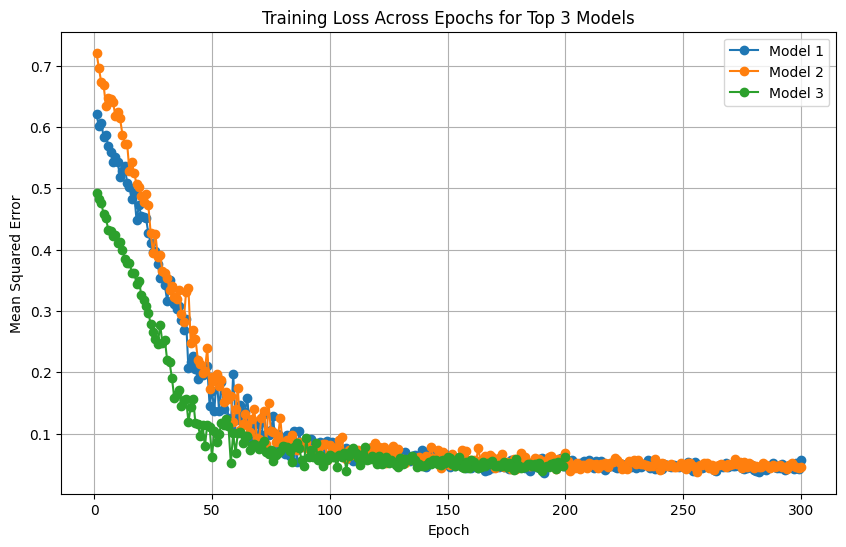

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
from torch_geometric.utils import from_networkx, subgraph
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from torch_geometric.data import Data, DataLoader
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt

# بارگذاری داده‌ها
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# تبدیل ستون 'Key' به فرمت datetime
dataset['Key'] = pd.to_datetime(dataset['Key'])

# استخراج ویژگی‌های زمانی
dataset['Hour'] = dataset['Key'].dt.hour
dataset['Day'] = dataset['Key'].dt.day
dataset['Month'] = dataset['Key'].dt.month
dataset['Year'] = dataset['Key'].dt.year
dataset['DayOfWeek'] = dataset['Key'].dt.dayofweek

# استخراج timestamp و اضافه کردن آن به دیتافریم
dataset['Key_timestamp'] = dataset['Key'].apply(lambda x: x.timestamp())

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']]
)

# تبدیل گراف به داده‌های PyTorch Geometric
data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

# تابع کمکی برای تبدیل به long tensor
def to_long_tensor(indices):
    return torch.tensor(indices.values, dtype=torch.long)

# تقسیم داده‌ها به مجموعه‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(dataset, dataset['Ilegality_Rate'], test_size=0.2, random_state=42)

train_indices = to_long_tensor(X_train.index)
test_indices = to_long_tensor(X_test.index)

train_data = data.subgraph(train_indices)
test_data = data.subgraph(test_indices)

train_loader = DataLoader([train_data], batch_size=1, shuffle=True)
test_loader = DataLoader([test_data], batch_size=1, shuffle=False)

# ساخت و ارزیابی مدل (به همان شکل که قبلاً نشان داده شده است)
# این بخش را می‌توانید بر اساس مدل و توابع ارزیابی خود تنظیم کنید

# تعریف مدل
class GATGRU(nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_heads):
        super(GATGRU, self).__init__()
        self.conv1 = GATConv(num_node_features, hidden_channels, heads=num_heads, dropout=0.6)
        self.conv2 = GATConv(hidden_channels * num_heads, hidden_channels, heads=1, concat=False, dropout=0.6)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels)  # Adding GRU layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        x = self.fc(x)
        return x.squeeze()

# تابع آموزش و ارزیابی مدل
def train_model(params, train_loader, test_loader):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = GATGRU(num_node_features=4, hidden_channels=hidden_channels, num_heads=num_heads)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    epoch_results = []  # اضافه کردن این خط
    for epoch in range(epochs):
        epoch_start_time = time.time()
        epoch_loss = 0.0  # اضافه کردن این خط
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()  # اضافه کردن این خط
        epoch_results.append(epoch_loss / len(train_loader))  # اضافه کردن این خط
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time

    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs

    return mae, mse, rmse, r2, training_time_per_epoch, epoch_results  # اضافه کردن این خط

# تنظیمات Grid Search و اجرای آن
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

results = []

for params in ParameterGrid(param_grid):
    mae, mse, rmse, r2, training_time_per_epoch, epoch_results = train_model(params, train_loader, test_loader)
    results.append((params, mae, mse, rmse, r2, training_time_per_epoch, epoch_results))

results_df = pd.DataFrame(results, columns=['Params', 'MAE', 'MSE', 'RMSE', 'R2', 'Training_Time_Per_Epoch', 'Epoch_Results'])

# نمایش نتایج
# پیدا کردن سه بهترین ایپوک براساس RMSE
top_n = 3
best_idx = results_df['RMSE'].nsmallest(top_n).index
best_models = results_df.loc[best_idx]

# پرینت مشخصات سه بهترین مدل
for idx, (_, row) in enumerate(best_models.iterrows()):
    print(f"Model {idx+1} Parameters:")
    print(row['Params'])
    print()

# نمایش نمودارهای سه بهترین ایپوک
plt.figure(figsize=(10, 6))
for idx, (_, row) in enumerate(best_models.iterrows()):
    plt.plot(range(1, len(row['Epoch_Results']) + 1), row['Epoch_Results'], marker='o', linestyle='-', label=f"Model {idx+1}")

plt.title('Training Loss Across Epochs for Top 3 Models')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
results_df.to_csv('/content/residual_neural_networks_parking_violation_prediction/Data/results.csv', index=False)

####GAT And GRU with merge

In [ ]:
import torch
import torch.nn as nn
import networkx as nx
from sklearn.preprocessing import StandardScaler
from torch_geometric.utils import from_networkx
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import DataLoader
import itertools
from torch.optim import AdamW
import time

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
Final_Weather_Data=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Final_Weather_Data.csv',low_memory=False,sep=',',index_col=0)
distance=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance.csv',low_memory=False,sep=',',index_col=0)
dataset=dataset.merge(Final_Weather_Data, on='Key')
dataset=dataset.merge(distance,on="Slot_id")
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[[ 'Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','humidity']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

class GATGRU(nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_heads):
        super(GATGRU, self).__init__()
        self.conv1 = GATConv(num_node_features, hidden_channels, heads=num_heads, dropout=0.6)
        self.conv2 = GATConv(hidden_channels * num_heads, hidden_channels, heads=1, concat=False, dropout=0.6)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels)  # Adding GRU layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        x = self.fc(x)
        return x.squeeze()


def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = GATGRU(num_node_features=4, hidden_channels=hidden_channels, num_heads=num_heads)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')



####Mean on GAT-GRU

In [ ]:
import pandas as pd
import numpy as np
import torch.nn as nn
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import DataLoader
from torch.optim import AdamW
import itertools
import time
from sklearn.model_selection import train_test_split

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
Final_Weather_Data = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Final_Weather_Data.csv', low_memory=False, sep=',', index_col=0)
distance = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance.csv', low_memory=False, sep=',', index_col=0)
dataset = dataset.merge(Final_Weather_Data, on='Key')
dataset = dataset.merge(distance, on="Slot_id")
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

dataset['Key'] = pd.to_datetime(dataset['Key'])
dataset['Key'] = dataset['Key'].astype(int)  # یا به فرمت دیگری که مناسب تر باشد

# استفاده از Mean Imputation برای پر کردن مقادیر گم شده
dataset.fillna(dataset.mean(), inplace=True)

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j + 1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

# تقسیم داده‌ها به دو بخش آموزش و آزمایش
train_idx, test_idx = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)
train_idx = torch.tensor(train_idx, dtype=torch.long)
test_idx = torch.tensor(test_idx, dtype=torch.long)

train_data = data.subgraph(train_idx)
test_data = data.subgraph(test_idx)

# ایجاد DataLoader برای آموزش و آزمایش
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)
test_loader = DataLoader([test_data], batch_size=32, shuffle=False)

class GATGRU(nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_heads):
        super(GATGRU, self).__init__()
        self.conv1 = GATConv(num_node_features, hidden_channels, heads=num_heads, dropout=0.6)
        self.conv2 = GATConv(hidden_channels * num_heads, hidden_channels, heads=1, concat=False, dropout=0.6)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels)  # Adding GRU layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = GATGRU(num_node_features=6, hidden_channels=hidden_channels, num_heads=num_heads)  # اصلاح تعداد ویژگی‌ها به 5
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time

    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs

    return mae, mse, rmse, r2, training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2, best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2, training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2, best_time = mae, mse, rmse, r2, training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')


####LOCF+NOCB on GAT-GRU

In [ ]:
import pandas as pd
import numpy as np
import torch.nn as nn
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import DataLoader
from torch.optim import AdamW
import itertools
import time
from sklearn.model_selection import train_test_split

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
Final_Weather_Data=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Final_Weather_Data.csv',low_memory=False,sep=',',index_col=0)
distance=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance.csv',low_memory=False,sep=',',index_col=0)
dataset=dataset.merge(Final_Weather_Data, on='Key')
dataset=dataset.merge(distance,on="Slot_id")
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# استفاده از تکنیک‌های LOCF و NOCB برای پر کردن مقادیر گم شده
dataset.fillna(method='ffill', inplace=True)  # LOCF
dataset.fillna(method='bfill', inplace=True)  # NOCB

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j + 1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

# تقسیم داده‌ها به دو بخش آموزش و آزمایش
train_idx, test_idx = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)
train_idx = torch.tensor(train_idx, dtype=torch.long)
test_idx = torch.tensor(test_idx, dtype=torch.long)

train_data = data.subgraph(train_idx)
test_data = data.subgraph(test_idx)

# ایجاد DataLoader برای آموزش و آزمایش
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)
test_loader = DataLoader([test_data], batch_size=32, shuffle=False)

class GATGRU(nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_heads):
        super(GATGRU, self).__init__()
        self.conv1 = GATConv(num_node_features, hidden_channels, heads=num_heads, dropout=0.6)
        self.conv2 = GATConv(hidden_channels * num_heads, hidden_channels, heads=1, concat=False, dropout=0.6)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels)  # Adding GRU layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = GATGRU(num_node_features=6, hidden_channels=hidden_channels, num_heads=num_heads)  # اصلاح تعداد ویژگی‌ها به 6
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time

    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs

    return mae, mse, rmse, r2, training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2, best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2, training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2, best_time = mae, mse, rmse, r2, training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')


####Interpolation on GAT-GRU

In [ ]:
import pandas as pd
import numpy as np
import torch.nn as nn
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import DataLoader
from torch.optim import AdamW
import itertools
import time
from sklearn.model_selection import train_test_split

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
Final_Weather_Data = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Final_Weather_Data.csv', low_memory=False, sep=',', index_col=0)
distance = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance.csv', low_memory=False, sep=',', index_col=0)
dataset = dataset.merge(Final_Weather_Data, on='Key')
dataset = dataset.merge(distance, on="Slot_id")
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# استفاده از تکنیک interpolation برای پر کردن مقادیر گم شده
dataset.interpolate(method='linear', inplace=True)

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j + 1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

# تقسیم داده‌ها به دو بخش آموزش و آزمایش
train_idx, test_idx = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)
train_idx = torch.tensor(train_idx, dtype=torch.long)
test_idx = torch.tensor(test_idx, dtype=torch.long)

train_data = data.subgraph(train_idx)
test_data = data.subgraph(test_idx)

# ایجاد DataLoader برای آموزش و آزمایش
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)
test_loader = DataLoader([test_data], batch_size=32, shuffle=False)

class GATGRU(nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_heads):
        super(GATGRU, self).__init__()
        self.conv1 = GATConv(num_node_features, hidden_channels, heads=num_heads, dropout=0.6)
        self.conv2 = GATConv(hidden_channels * num_heads, hidden_channels, heads=1, concat=False, dropout=0.6)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels)  # Adding GRU layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = GATGRU(num_node_features=6, hidden_channels=hidden_channels, num_heads=num_heads)  # اصلاح تعداد ویژگی‌ها به 6
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time

    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs

    return mae, mse, rmse, r2, training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2, best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2, training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2, best_time = mae, mse, rmse, r2, training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')


####MICE on GAT-GRU

In [ ]:
import pandas as pd
import numpy as np
import torch.nn as nn
from torch_geometric.nn import GATConv
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch.nn.functional as F
from torch_geometric.data import DataLoader
from torch.optim import AdamW
import itertools
import time
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
Final_Weather_Data = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Final_Weather_Data.csv', low_memory=False, sep=',', index_col=0)
distance = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance.csv', low_memory=False, sep=',', index_col=0)
dataset = dataset.merge(Final_Weather_Data, on='Key')
dataset = dataset.merge(distance, on="Slot_id")
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

imputer = SimpleImputer(strategy='mean')
numeric_features = ['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']
imputer.fit(dataset[numeric_features])
dataset[numeric_features] = imputer.transform(dataset[numeric_features])

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j + 1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[numeric_features] = scaler.fit_transform(dataset[numeric_features])


data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

# تقسیم داده‌ها به دو بخش آموزش و آزمایش
train_idx, test_idx = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)
train_idx = torch.tensor(train_idx, dtype=torch.long)
test_idx = torch.tensor(test_idx, dtype=torch.long)

train_data = data.subgraph(train_idx)
test_data = data.subgraph(test_idx)

# ایجاد DataLoader برای آموزش و آزمایش
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)
test_loader = DataLoader([test_data], batch_size=32, shuffle=False)

class GATGRU(nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_heads):
        super(GATGRU, self).__init__()
        self.conv1 = GATConv(num_node_features, hidden_channels, heads=num_heads, dropout=0.6)
        self.conv2 = GATConv(hidden_channels * num_heads, hidden_channels, heads=1, concat=False, dropout=0.6)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels)  # Adding GRU layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = GATGRU(num_node_features=6, hidden_channels=hidden_channels, num_heads=num_heads)  # اصلاح تعداد ویژگی‌ها به 6
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time

    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs

    return mae, mse, rmse, r2, training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2, best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2, training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2, best_time = mae, mse, rmse, r2, training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')


####MICE+interpolation on GAT-GRU

In [ ]:
import pandas as pd
import numpy as np
import torch.nn as nn
from torch_geometric.nn import GATConv
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch.nn.functional as F
from torch_geometric.nn import ChebConv
from torch_geometric.data import DataLoader
from torch.optim import AdamW
import itertools
import time
from sklearn.model_selection import train_test_split
import impyute as impy
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
Final_Weather_Data = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Final_Weather_Data.csv', low_memory=False, sep=',', index_col=0)
distance = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance.csv', low_memory=False, sep=',', index_col=0)
dataset = dataset.merge(Final_Weather_Data, on='Key')
dataset = dataset.merge(distance, on="Slot_id")
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

imputer = SimpleImputer(strategy='mean')
numeric_features = ['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']
imputer.fit(dataset[numeric_features])
dataset[numeric_features] = imputer.transform(dataset[numeric_features])

# استفاده از interpolation برای پر کردن مقادیر گم شده
dataset.interpolate(method='linear', inplace=True)

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j + 1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[numeric_features] = scaler.fit_transform(dataset[numeric_features])

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

# تقسیم داده‌ها به دو بخش آموزش و آزمایش
train_idx, test_idx = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)
train_idx = torch.tensor(train_idx, dtype=torch.long)
test_idx = torch.tensor(test_idx, dtype=torch.long)

train_data = data.subgraph(train_idx)
test_data = data.subgraph(test_idx)

# ایجاد DataLoader برای آموزش و آزمایش
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)
test_loader = DataLoader([test_data], batch_size=32, shuffle=False)

class GATGRU(nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_heads):
        super(GATGRU, self).__init__()
        self.conv1 = GATConv(num_node_features, hidden_channels, heads=num_heads, dropout=0.6)
        self.conv2 = GATConv(hidden_channels * num_heads, hidden_channels, heads=1, concat=False, dropout=0.6)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels)  # Adding GRU layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = GATGRU(num_node_features=6, hidden_channels=hidden_channels, num_heads=num_heads)  # اصلاح تعداد ویژگی‌ها به 6
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time

    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs

    return mae, mse, rmse, r2, training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2, best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2, training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2, best_time = mae, mse, rmse, r2, training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')


####GAT-GRU with merge and adam hyper-parameter

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import DataLoader
import time
from torch.optim import Adam


# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
Final_Weather_Data=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Final_Weather_Data.csv',low_memory=False,sep=',',index_col=0)
distance=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance.csv',low_memory=False,sep=',',index_col=0)
dataset=dataset.merge(Final_Weather_Data, on='Key')
dataset=dataset.merge(distance,on="Slot_id")
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[[ 'Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

class GATGRU(nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_heads):
        super(GATGRU, self).__init__()
        self.conv1 = GATConv(num_node_features, hidden_channels, heads=num_heads, dropout=0.6)
        self.conv2 = GATConv(hidden_channels * num_heads, hidden_channels, heads=1, concat=False, dropout=0.6)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels)  # Adding GRU layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        x = self.fc(x)
        return x.squeeze()


def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = GATGRU(num_node_features=4, hidden_channels=hidden_channels, num_heads=num_heads)
    optimizer = Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')



####GAT-GRU with merge and adagrad hyper-parameter

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import DataLoader
import time
from torch.optim import Adagrad

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
Final_Weather_Data=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Final_Weather_Data.csv',low_memory=False,sep=',',index_col=0)
distance=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance.csv',low_memory=False,sep=',',index_col=0)
dataset=dataset.merge(Final_Weather_Data, on='Key')
dataset=dataset.merge(distance,on="Slot_id")
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[[ 'Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

class GATGRU(nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_heads):
        super(GATGRU, self).__init__()
        self.conv1 = GATConv(num_node_features, hidden_channels, heads=num_heads, dropout=0.6)
        self.conv2 = GATConv(hidden_channels * num_heads, hidden_channels, heads=1, concat=False, dropout=0.6)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels)  # Adding GRU layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        x = self.fc(x)
        return x.squeeze()


def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = GATGRU(num_node_features=4, hidden_channels=hidden_channels, num_heads=num_heads)
    optimizer = Adagrad(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')



####GAT-CNN without merge

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import DataLoader
from torch_geometric.utils import subgraph
from torch.optim import AdamW
import itertools
import time

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[[ 'Covid', 'Capacity', 'Holidays', 'Slot_Timeint']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

class ParkingGAT_CNN(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_heads):
        super(ParkingGAT_CNN, self).__init__()
        self.conv1 = GATConv(num_node_features, hidden_channels, heads=num_heads, dropout=0.6)
        self.conv2 = GATConv(hidden_channels * num_heads, hidden_channels, heads=1, concat=False, dropout=0.6)
        self.cnn = torch.nn.Conv1d(in_channels=hidden_channels, out_channels=hidden_channels, kernel_size=3, padding=1)  # Adding CNN layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying CNN to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x = x.permute(0, 2, 1)  # Adjusting dimensions for CNN input
        x = self.cnn(x)
        x = F.relu(x)
        x = x.permute(0, 2, 1)  # Restoring original dimensions

        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingGAT_CNN(num_node_features=4, hidden_channels=hidden_channels, num_heads=num_heads)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')


####GAT-CNN with merge

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import DataLoader
import time

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
Final_Weather_Data=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Final_Weather_Data.csv',low_memory=False,sep=',',index_col=0)
distance=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance.csv',low_memory=False,sep=',',index_col=0)
dataset=dataset.merge(Final_Weather_Data, on='Key')
dataset=dataset.merge(distance,on="Slot_id")
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[[ 'Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

class ParkingGAT_CNN(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_heads):
        super(ParkingGAT_CNN, self).__init__()
        self.conv1 = GATConv(num_node_features, hidden_channels, heads=num_heads, dropout=0.6)
        self.conv2 = GATConv(hidden_channels * num_heads, hidden_channels, heads=1, concat=False, dropout=0.6)
        self.cnn = torch.nn.Conv1d(in_channels=hidden_channels, out_channels=hidden_channels, kernel_size=3, padding=1)  # Adding CNN layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying CNN to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x = x.permute(0, 2, 1)  # Adjusting dimensions for CNN input
        x = self.cnn(x)
        x = F.relu(x)
        x = x.permute(0, 2, 1)  # Restoring original dimensions

        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingGAT_CNN(num_node_features=4, hidden_channels=hidden_channels, num_heads=num_heads)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')

####GAT-GRUAtt without merge


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import DataLoader
import time

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[[ 'Covid', 'Capacity', 'Holidays', 'Slot_Timeint']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

class ParkingGAT_GRUAtt(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_heads):
        super(ParkingGAT_GRUAtt, self).__init__()
        self.conv1 = GATConv(num_node_features, hidden_channels, heads=num_heads, dropout=0.6)
        self.conv2 = GATConv(hidden_channels * num_heads, hidden_channels, heads=1, concat=False, dropout=0.6)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels, batch_first=True)  # Adding GRU layer
        self.attention = torch.nn.Linear(hidden_channels, 1)  # Attention mechanism
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        # Applying Attention mechanism
        attention_weights = F.softmax(self.attention(x), dim=1)
        x = torch.sum(x * attention_weights, dim=1)

        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingGAT_CNN(num_node_features=4, hidden_channels=hidden_channels, num_heads=num_heads)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')

####GAT-GRUAtt with merge

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import DataLoader
import time

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
Final_Weather_Data=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Final_Weather_Data.csv',low_memory=False,sep=',',index_col=0)
distance=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance.csv',low_memory=False,sep=',',index_col=0)
dataset=dataset.merge(Final_Weather_Data, on='Key')
dataset=dataset.merge(distance,on="Slot_id")
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[[ 'Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

class ParkingGAT_GRUAtt(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_heads):
        super(ParkingGAT_GRUAtt, self).__init__()
        self.conv1 = GATConv(num_node_features, hidden_channels, heads=num_heads, dropout=0.6)
        self.conv2 = GATConv(hidden_channels * num_heads, hidden_channels, heads=1, concat=False, dropout=0.6)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels, batch_first=True)  # Adding GRU layer
        self.attention = torch.nn.Linear(hidden_channels, 1)  # Attention mechanism
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        # Applying Attention mechanism
        attention_weights = F.softmax(self.attention(x), dim=1)
        x = torch.sum(x * attention_weights, dim=1)

        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingGAT_CNN(num_node_features=4, hidden_channels=hidden_channels, num_heads=num_heads)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')

####GAT-CNNAtt without merge


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import DataLoader
import time

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[[ 'Covid', 'Capacity', 'Holidays', 'Slot_Timeint']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

class ParkingGAT_CNNAtt(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_heads):
        super(ParkingGAT_CNNAtt, self).__init__()
        self.conv1 = GATConv(num_node_features, hidden_channels, heads=num_heads, dropout=0.6)
        self.conv2 = GATConv(hidden_channels * num_heads, hidden_channels, heads=1, concat=False, dropout=0.6)
        self.cnn = torch.nn.Conv1d(in_channels=hidden_channels, out_channels=hidden_channels, kernel_size=3, padding=1)  # Adding CNN layer
        self.attention = torch.nn.Linear(hidden_channels, 1)  # Attention mechanism
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying CNN to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x = x.permute(0, 2, 1)  # Adjusting dimensions for CNN input
        x = self.cnn(x)
        x = F.relu(x)
        x = x.permute(0, 2, 1)  # Restoring original dimensions

        # Applying Attention mechanism
        attention_weights = F.softmax(self.attention(x), dim=1)
        x = torch.sum(x * attention_weights, dim=1)

        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingGAT_CNN(num_node_features=4, hidden_channels=hidden_channels, num_heads=num_heads)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')


####GAT-CNNAtt with merge

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import DataLoader
import time

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
Final_Weather_Data=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Final_Weather_Data.csv',low_memory=False,sep=',',index_col=0)
distance=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance.csv',low_memory=False,sep=',',index_col=0)
dataset=dataset.merge(Final_Weather_Data, on='Key')
dataset=dataset.merge(distance,on="Slot_id")
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[[ 'Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

class ParkingGAT_CNNAtt(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_heads):
        super(ParkingGAT_CNNAtt, self).__init__()
        self.conv1 = GATConv(num_node_features, hidden_channels, heads=num_heads, dropout=0.6)
        self.conv2 = GATConv(hidden_channels * num_heads, hidden_channels, heads=1, concat=False, dropout=0.6)
        self.cnn = torch.nn.Conv1d(in_channels=hidden_channels, out_channels=hidden_channels, kernel_size=3, padding=1)  # Adding CNN layer
        self.attention = torch.nn.Linear(hidden_channels, 1)  # Attention mechanism
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying CNN to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x = x.permute(0, 2, 1)  # Adjusting dimensions for CNN input
        x = self.cnn(x)
        x = F.relu(x)
        x = x.permute(0, 2, 1)  # Restoring original dimensions

        # Applying Attention mechanism
        attention_weights = F.softmax(self.attention(x), dim=1)
        x = torch.sum(x * attention_weights, dim=1)

        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingGAT_CNN(num_node_features=4, hidden_channels=hidden_channels, num_heads=num_heads)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')

####GCN-GRU without merge

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import DataLoader
import time

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[[ 'Covid', 'Capacity', 'Holidays', 'Slot_Timeint']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

class ParkingGCN_GRU(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels):
        super(ParkingGCN_GRU, self).__init__()
        self.conv1 = GCNConv(num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels, batch_first=True)  # Adding GRU layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingGAT_CNN(num_node_features=4, hidden_channels=hidden_channels, num_heads=num_heads)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')

####GCN-GRU with merge

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import DataLoader
import time

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
Final_Weather_Data=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Final_Weather_Data.csv',low_memory=False,sep=',',index_col=0)
distance=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance.csv',low_memory=False,sep=',',index_col=0)
dataset=dataset.merge(Final_Weather_Data, on='Key')
dataset=dataset.merge(distance,on="Slot_id")
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[[ 'Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

class ParkingGCN_GRU(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels):
        super(ParkingGCN_GRU, self).__init__()
        self.conv1 = GCNConv(num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels, batch_first=True)  # Adding GRU layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingGAT_CNN(num_node_features=4, hidden_channels=hidden_channels, num_heads=num_heads)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')

####GCN-CNN without merge


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import DataLoader
import time

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[[ 'Covid', 'Capacity', 'Holidays', 'Slot_Timeint']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

class ParkingGCN_CNN(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels):
        super(ParkingGCN_CNN, self).__init__()
        self.conv1 = GCNConv(num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.cnn = torch.nn.Conv1d(in_channels=hidden_channels, out_channels=hidden_channels, kernel_size=3, padding=1)  # Adding CNN layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying CNN to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x = x.permute(0, 2, 1)  # Adjusting dimensions for CNN input
        x = self.cnn(x)
        x = F.relu(x)
        x = x.permute(0, 2, 1)  # Restoring original dimensions

        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingGCN_CNN(num_node_features=4, hidden_channels=hidden_channels)

    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')


####GCN-CNN with merge


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import DataLoader
import time

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
Final_Weather_Data=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Final_Weather_Data.csv',low_memory=False,sep=',',index_col=0)
distance=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance.csv',low_memory=False,sep=',',index_col=0)
dataset=dataset.merge(Final_Weather_Data, on='Key')
dataset=dataset.merge(distance,on="Slot_id")
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[[ 'Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

class ParkingGCN_CNN(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels):
        super(ParkingGCN_CNN, self).__init__()
        self.conv1 = GCNConv(num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.cnn = torch.nn.Conv1d(in_channels=hidden_channels, out_channels=hidden_channels, kernel_size=3, padding=1)  # Adding CNN layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying CNN to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x = x.permute(0, 2, 1)  # Adjusting dimensions for CNN input
        x = self.cnn(x)
        x = F.relu(x)
        x = x.permute(0, 2, 1)  # Restoring original dimensions

        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingGCN_CNN(num_node_features=4, hidden_channels=hidden_channels)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')


####GCN-GRUAtt without merge


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import DataLoader
import time
import networkx as nx
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from torch_geometric.utils import from_networkx
from torch.optim import AdamW
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset and distance1.csv assuming they are already loaded
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# Build graph using distances
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']])

sigma = distances.values.std()
k = 100

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

# Split data into train and test sets
train_idx, test_idx = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)
train_idx = torch.tensor(train_idx, dtype=torch.long)
test_idx = torch.tensor(test_idx, dtype=torch.long)

train_data = data.subgraph(train_idx)
test_data = data.subgraph(test_idx)

# Create DataLoader for train and test
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)
test_loader = DataLoader([test_data], batch_size=32, shuffle=False)

class ParkingGCN_GRUAtt(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels):
        super(ParkingGCN_GRUAtt, self).__init__()
        self.conv1 = GCNConv(num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels, batch_first=True)
        self.attention = torch.nn.Linear(hidden_channels, 1)
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)
        x, _ = self.gru(x)
        x = x.squeeze(0)

        # Applying Attention mechanism
        attention_weights = F.softmax(self.attention(x), dim=1).unsqueeze(-1)
        x = torch.sum(x * attention_weights, dim=1)

        x = self.fc(x)
        return x.squeeze()


def train_model(params):
    hidden_channels = params['hidden_channels']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingGCN_GRUAtt(num_node_features=4, hidden_channels=hidden_channels)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time

    # Evaluate the model
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs

    return mae, mse, rmse, r2, training_time_per_epoch


# Helper function to generate all possible parameter combinations
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))


# Grid Search settings
param_grid = {
    'hidden_channels': [32, 64, 128],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2, best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2, training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2, best_time = mae, mse, rmse, r2, training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Best Parameters: {'hidden_channels': 32, 'lr': 0.0001, 'weight_decay': 0.01, 'epochs': 300}
Best MAE: 0.18715616663297016
Best MSE: 0.04341365029986507
Best RMSE: 0.20835942575238844
Best R2: -0.5407379043396074
Best time: 0.03294260660807292


####GCN-GRUAtt with merge

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import DataLoader
import time
import networkx as nx
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from torch_geometric.utils import from_networkx
from torch.optim import AdamW
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
Final_Weather_Data = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Final_Weather_Data.csv', low_memory=False, sep=',', index_col=0)
distance = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance.csv', low_memory=False, sep=',', index_col=0)
dataset = dataset.merge(Final_Weather_Data, on='Key')
dataset = dataset.merge(distance, on="Slot_id")
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

# Split data into train and test sets
train_idx, test_idx = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)
train_idx = torch.tensor(train_idx, dtype=torch.long)
test_idx = torch.tensor(test_idx, dtype=torch.long)

train_data = data.subgraph(train_idx)
test_data = data.subgraph(test_idx)

# Create DataLoader for train and test
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)
test_loader = DataLoader([test_data], batch_size=32, shuffle=False)

class ParkingGCN_GRUAtt(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels):
        super(ParkingGCN_GRUAtt, self).__init__()
        self.conv1 = GCNConv(num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels, batch_first=True)
        self.attention = torch.nn.Linear(hidden_channels, 1)
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)
        x, _ = self.gru(x)
        x = x.squeeze(0)

        # Applying Attention mechanism
        attention_weights = F.softmax(self.attention(x), dim=1).unsqueeze(-1)
        x = torch.sum(x * attention_weights, dim=1)

        x = self.fc(x)
        return x.squeeze()


def train_model(params):
    hidden_channels = params['hidden_channels']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingGCN_GRUAtt(num_node_features=6, hidden_channels=hidden_channels)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time

    # Evaluate the model
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs

    return mae, mse, rmse, r2, training_time_per_epoch


# Helper function to generate all possible parameter combinations
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))


# Grid Search settings
param_grid = {
    'hidden_channels': [32, 64, 128],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2, best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2, training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2, best_time = mae, mse, rmse, r2, training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Best Parameters: {'hidden_channels': 32, 'lr': 0.0001, 'weight_decay': 0.0001, 'epochs': 200}
Best MAE: 0.19345046083132425
Best MSE: 0.05393502713106321
Best RMSE: 0.23223915934024394
Best R2: -1.7719153377709316
Best time: 0.03770178079605103


####GCN-CNNAtt without merge

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import numpy as np
import pandas as pd
import time
import networkx as nx
from sklearn.preprocessing import StandardScaler
from torch_geometric.utils import from_networkx
import itertools
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from torch_geometric.data import DataLoader

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

# Split data into train and test sets
train_idx, test_idx = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)
train_idx = torch.tensor(train_idx, dtype=torch.long)
test_idx = torch.tensor(test_idx, dtype=torch.long)

train_data = data.subgraph(train_idx)
test_data = data.subgraph(test_idx)

# Create DataLoader for train and test
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)
test_loader = DataLoader([test_data], batch_size=32, shuffle=False)

class ParkingGCN_CNNAtt(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels):
        super(ParkingGCN_CNNAtt, self).__init__()
        self.conv1 = GCNConv(num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.cnn = torch.nn.Conv1d(in_channels=hidden_channels, out_channels=hidden_channels, kernel_size=3, padding=1)  # Adding CNN layer
        self.attention = torch.nn.Linear(hidden_channels, 1)  # Attention mechanism
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying CNN to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x = x.permute(0, 2, 1)  # Adjusting dimensions for CNN input
        x = self.cnn(x)
        x = F.relu(x)
        x = x.permute(0, 2, 1)  # Restoring original dimensions

        # Applying Attention mechanism
        attention_weights = F.softmax(self.attention(x), dim=1)
        x = torch.sum(x * attention_weights, dim=1)

        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingGCN_CNNAtt(num_node_features=4, hidden_channels=hidden_channels)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time

    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.cpu().numpy().tolist())
            y_pred.append(output.item())  # تغییر داده شده به item()

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs

    return mae, mse, rmse, r2, training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2, training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2, best_time = mae, mse, rmse, r2, training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([59])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


ValueError: Found input variables with inconsistent numbers of samples: [15, 1]

####GCN-CNNAtt with merge

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch.nn import Conv1d
import time

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
Final_Weather_Data=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Final_Weather_Data.csv',low_memory=False,sep=',',index_col=0)
distance=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance.csv',low_memory=False,sep=',',index_col=0)
dataset=dataset.merge(Final_Weather_Data, on='Key')
dataset=dataset.merge(distance,on="Slot_id")
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[[ 'Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

class ParkingGCN_CNNAtt(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels):
        super(ParkingGCN_CNNAtt, self).__init__()
        self.conv1 = GCNConv(num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.cnn = torch.nn.Conv1d(in_channels=hidden_channels, out_channels=hidden_channels, kernel_size=3, padding=1)  # Adding CNN layer
        self.attention = torch.nn.Linear(hidden_channels, 1)  # Attention mechanism
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying CNN to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x = x.permute(0, 2, 1)  # Adjusting dimensions for CNN input
        x = self.cnn(x)
        x = F.relu(x)
        x = x.permute(0, 2, 1)  # Restoring original dimensions

        # Applying Attention mechanism
        attention_weights = F.softmax(self.attention(x), dim=1)
        x = torch.sum(x * attention_weights, dim=1)

        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingGCN_CNNAtt(num_node_features=4, hidden_channels=hidden_channels)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')

####Effect of the number of Historical Features and Prediction Horizons on Cheb-GRU

/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Model 1 Parameters:
{'epochs': 200, 'hidden_channels': 32, 'lr': 0.001, 'num_heads': 1, 'weight_decay': 0.001}

Model 2 Parameters:
{'epochs': 300, 'hidden_channels': 32, 'lr': 0.001, 'num_heads': 1, 'weight_decay': 0.0001}

Model 3 Parameters:
{'epochs': 300, 'hidden_channels': 32, 'lr': 0.001, 'num_heads': 2, 'weight_decay': 0.01}



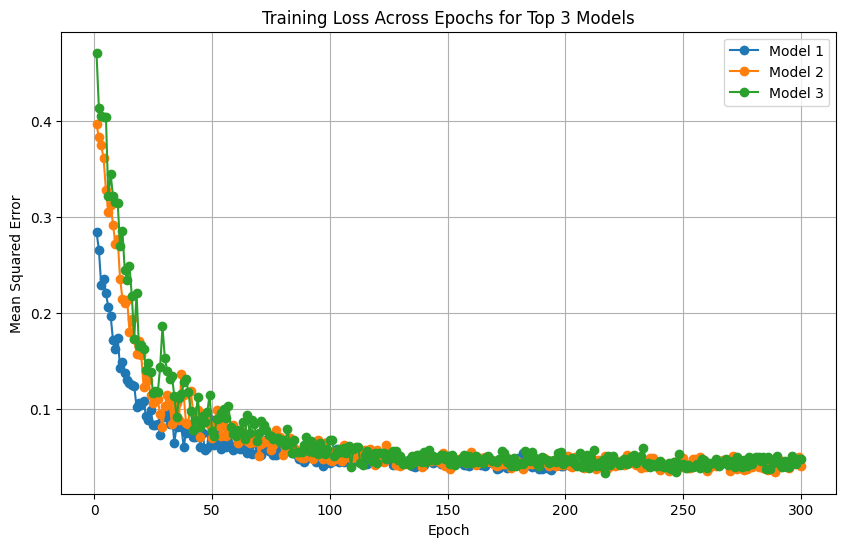

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
from torch_geometric.utils import from_networkx, subgraph
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from torch_geometric.data import Data, DataLoader
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
from torch.nn import ModuleList
from torch_geometric.nn import ChebConv


# بارگذاری داده‌ها
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# تبدیل ستون 'Key' به فرمت datetime
dataset['Key'] = pd.to_datetime(dataset['Key'])

# استخراج ویژگی‌های زمانی
dataset['Hour'] = dataset['Key'].dt.hour
dataset['Day'] = dataset['Key'].dt.day
dataset['Month'] = dataset['Key'].dt.month
dataset['Year'] = dataset['Key'].dt.year
dataset['DayOfWeek'] = dataset['Key'].dt.dayofweek

# استخراج timestamp و اضافه کردن آن به دیتافریم
dataset['Key_timestamp'] = dataset['Key'].apply(lambda x: x.timestamp())

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']]
)

# تبدیل گراف به داده‌های PyTorch Geometric
data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

# تابع کمکی برای تبدیل به long tensor
def to_long_tensor(indices):
    return torch.tensor(indices.values, dtype=torch.long)

# تقسیم داده‌ها به مجموعه‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(dataset, dataset['Ilegality_Rate'], test_size=0.2, random_state=42)

train_indices = to_long_tensor(X_train.index)
test_indices = to_long_tensor(X_test.index)

train_data = data.subgraph(train_indices)
test_data = data.subgraph(test_indices)

train_loader = DataLoader([train_data], batch_size=1, shuffle=True)
test_loader = DataLoader([test_data], batch_size=1, shuffle=False)

# ساخت و ارزیابی مدل (به همان شکل که قبلاً نشان داده شده است)
# این بخش را می‌توانید بر اساس مدل و توابع ارزیابی خود تنظیم کنید

# تعریف مدل
class ChebGRU(nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_heads):
        super(ChebGRU, self).__init__()
        self.conv1 = ChebConv(num_node_features, hidden_channels, K=2)  # تعداد مراحل Chebyshev
        self.conv2 = ChebConv(hidden_channels, hidden_channels, K=2)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels)
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)
        x, _ = self.gru(x)
        x = x.squeeze(0)

        x = self.fc(x)
        return x.squeeze()

# تابع آموزش و ارزیابی مدل
def train_model(params, train_loader, test_loader):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ChebGRU(num_node_features=4, hidden_channels=hidden_channels, num_heads=num_heads)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    epoch_results = []  # اضافه کردن این خط
    for epoch in range(epochs):
        epoch_start_time = time.time()
        epoch_loss = 0.0  # اضافه کردن این خط
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()  # اضافه کردن این خط
        epoch_results.append(epoch_loss / len(train_loader))  # اضافه کردن این خط
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time

    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs

    return mae, mse, rmse, r2, training_time_per_epoch, epoch_results  # اضافه کردن این خط

# تنظیمات Grid Search و اجرای آن
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

results = []

for params in ParameterGrid(param_grid):
    mae, mse, rmse, r2, training_time_per_epoch, epoch_results = train_model(params, train_loader, test_loader)
    results.append((params, mae, mse, rmse, r2, training_time_per_epoch, epoch_results))

results_df = pd.DataFrame(results, columns=['Params', 'MAE', 'MSE', 'RMSE', 'R2', 'Training_Time_Per_Epoch', 'Epoch_Results'])

# نمایش نتایج
# پیدا کردن سه بهترین ایپوک براساس RMSE
top_n = 3
best_idx = results_df['RMSE'].nsmallest(top_n).index
best_models = results_df.loc[best_idx]

# پرینت مشخصات سه بهترین مدل
for idx, (_, row) in enumerate(best_models.iterrows()):
    print(f"Model {idx+1} Parameters:")
    print(row['Params'])
    print()

# نمایش نمودارهای سه بهترین ایپوک
plt.figure(figsize=(10, 6))
for idx, (_, row) in enumerate(best_models.iterrows()):
    plt.plot(range(1, len(row['Epoch_Results']) + 1), row['Epoch_Results'], marker='o', linestyle='-', label=f"Model {idx+1}")

plt.title('Training Loss Across Epochs for Top 3 Models')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


####Cheb-GRU without merge

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch.nn.functional as F
from torch_geometric.nn import ChebConv
from torch_geometric.data import DataLoader
from torch.optim import AdamW
import itertools
import time

# Load data
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# Create graph
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']])

sigma = distances.values.std()
k = 100  # Distance threshold

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j + 1]
            if dist <= k:
                weight = np.exp(-dist ** 2 / (2 * sigma ** 2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']].values,
                     dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

class ParkingCheb_GRU(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, K=2):
        super(ParkingCheb_GRU, self).__init__()
        self.conv1 = ChebConv(num_node_features, hidden_channels, K)
        self.conv2 = ChebConv(hidden_channels, hidden_channels, K)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels, batch_first=True)  # Adding GRU layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingCheb_GRU(num_node_features=4, hidden_channels=hidden_channels)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')

####None of date onCheb-GRU

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import ChebConv
from torch_geometric.data import DataLoader
import time
import networkx as nx
from sklearn.preprocessing import StandardScaler
from torch_geometric.utils import from_networkx
import itertools
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

dataset['Key'] = pd.to_datetime(dataset['Key'])
dataset['Key_timestamp'] = dataset['Key'].apply(lambda x: x.timestamp())

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[['Covid', 'Capacity', 'Slot_Timeint']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Slot_Timeint']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Slot_Timeint']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Slot_Timeint']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

# تقسیم داده‌ها به دو بخش آموزش و آزمایش
train_idx, test_idx = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)
train_idx = torch.tensor(train_idx, dtype=torch.long)
test_idx = torch.tensor(test_idx, dtype=torch.long)

train_data = data.subgraph(train_idx)
test_data = data.subgraph(test_idx)

# ایجاد DataLoader برای آموزش و آزمایش
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)
test_loader = DataLoader([test_data], batch_size=32, shuffle=False)

class ParkingCheb_GRU(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, K=2):
        super(ParkingCheb_GRU, self).__init__()
        self.conv1 = ChebConv(num_node_features, hidden_channels, K)
        self.conv2 = ChebConv(hidden_channels, hidden_channels, K)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels, batch_first=True)  # Adding GRU layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        x = self.fc(x)
        return x.squeeze()


def train_model(params):
    hidden_channels = params['hidden_channels']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingCheb_GRU(num_node_features=3, hidden_channels=hidden_channels)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Best Parameters: {'hidden_channels': 128, 'lr': 0.01, 'weight_decay': 0.01, 'epochs': 300}
Best MAE: 0.1935079554716746
Best MSE: 0.05177209314351743
Best RMSE: 0.22753481743134923
Best R2: -0.8373766256063
Best time: 0.03143950223922729


####Date+Time on Cheb-GRU

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import ChebConv
from torch_geometric.data import DataLoader
import time
import networkx as nx
from sklearn.preprocessing import StandardScaler
from torch_geometric.utils import from_networkx
import itertools
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

dataset['Key'] = pd.to_datetime(dataset['Key'])
dataset['Key_timestamp'] = dataset['Key'].apply(lambda x: x.timestamp())

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[['Key_timestamp','Covid', 'Capacity', 'Slot_Timeint']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Key_timestamp','Covid', 'Capacity', 'Slot_Timeint']] = scaler.fit_transform(
    dataset[['Key_timestamp','Covid', 'Capacity', 'Slot_Timeint']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Key_timestamp','Covid', 'Capacity', 'Slot_Timeint']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

# تقسیم داده‌ها به دو بخش آموزش و آزمایش
train_idx, test_idx = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)
train_idx = torch.tensor(train_idx, dtype=torch.long)
test_idx = torch.tensor(test_idx, dtype=torch.long)

train_data = data.subgraph(train_idx)
test_data = data.subgraph(test_idx)

# ایجاد DataLoader برای آموزش و آزمایش
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)
test_loader = DataLoader([test_data], batch_size=32, shuffle=False)

class ParkingCheb_GRU(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, K=2):
        super(ParkingCheb_GRU, self).__init__()
        self.conv1 = ChebConv(num_node_features, hidden_channels, K)
        self.conv2 = ChebConv(hidden_channels, hidden_channels, K)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels, batch_first=True)  # Adding GRU layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        x = self.fc(x)
        return x.squeeze()


def train_model(params):
    hidden_channels = params['hidden_channels']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingCheb_GRU(num_node_features=4, hidden_channels=hidden_channels)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Best Parameters: {'hidden_channels': 128, 'lr': 0.01, 'weight_decay': 0.001, 'epochs': 300}
Best MAE: 0.1735514203707377
Best MSE: 0.04439142671624445
Best RMSE: 0.21069273057285212
Best R2: -0.5754389068187689
Best time: 0.0321809442838033


####Date+Holidays on Cheb-GRu

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import ChebConv
from torch_geometric.data import DataLoader
import time
import networkx as nx
from sklearn.preprocessing import StandardScaler
from torch_geometric.utils import from_networkx
import itertools
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

dataset['Key'] = pd.to_datetime(dataset['Key'])
dataset['Key_timestamp'] = dataset['Key'].apply(lambda x: x.timestamp())

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[['Key_timestamp','Covid', 'Capacity', 'Holidays', 'Slot_Timeint']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Key_timestamp','Covid', 'Capacity', 'Holidays', 'Slot_Timeint']] = scaler.fit_transform(
    dataset[['Key_timestamp','Covid', 'Capacity', 'Holidays', 'Slot_Timeint']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Key_timestamp','Covid', 'Capacity', 'Holidays', 'Slot_Timeint']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

# تقسیم داده‌ها به دو بخش آموزش و آزمایش
train_idx, test_idx = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)
train_idx = torch.tensor(train_idx, dtype=torch.long)
test_idx = torch.tensor(test_idx, dtype=torch.long)

train_data = data.subgraph(train_idx)
test_data = data.subgraph(test_idx)

# ایجاد DataLoader برای آموزش و آزمایش
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)
test_loader = DataLoader([test_data], batch_size=32, shuffle=False)

class ParkingCheb_GRU(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, K=2):
        super(ParkingCheb_GRU, self).__init__()
        self.conv1 = ChebConv(num_node_features, hidden_channels, K)
        self.conv2 = ChebConv(hidden_channels, hidden_channels, K)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels, batch_first=True)  # Adding GRU layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        x = self.fc(x)
        return x.squeeze()


def train_model(params):
    hidden_channels = params['hidden_channels']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingCheb_GRU(num_node_features=5, hidden_channels=hidden_channels)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')


####Date+Time+Holidays on Cheb-GRU

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import ChebConv
from torch_geometric.data import DataLoader
import time
import networkx as nx
from sklearn.preprocessing import StandardScaler
from torch_geometric.utils import from_networkx
import itertools
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

dataset['Key'] = pd.to_datetime(dataset['Key'])
dataset['Key_timestamp'] = dataset['Key'].apply(lambda x: x.timestamp())

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[['Key_timestamp','Covid', 'Capacity', 'Slot_Timeint']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Key_timestamp','Covid', 'Capacity', 'Slot_Timeint']] = scaler.fit_transform(
    dataset[['Key_timestamp','Covid', 'Capacity', 'Slot_Timeint']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Key_timestamp','Covid', 'Capacity', 'Slot_Timeint']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

# تقسیم داده‌ها به دو بخش آموزش و آزمایش
train_idx, test_idx = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)
train_idx = torch.tensor(train_idx, dtype=torch.long)
test_idx = torch.tensor(test_idx, dtype=torch.long)

train_data = data.subgraph(train_idx)
test_data = data.subgraph(test_idx)

# ایجاد DataLoader برای آموزش و آزمایش
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)
test_loader = DataLoader([test_data], batch_size=32, shuffle=False)

class ParkingCheb_GRU(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, K=2):
        super(ParkingCheb_GRU, self).__init__()
        self.conv1 = ChebConv(num_node_features, hidden_channels, K)
        self.conv2 = ChebConv(hidden_channels, hidden_channels, K)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels, batch_first=True)  # Adding GRU layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        x = self.fc(x)
        return x.squeeze()


def train_model(params):
    hidden_channels = params['hidden_channels']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingCheb_GRU(num_node_features=4, hidden_channels=hidden_channels)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')


####Date+Time on Cheb-GRU

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import ChebConv
from torch_geometric.data import DataLoader
import time
import networkx as nx
from sklearn.preprocessing import StandardScaler
from torch_geometric.utils import from_networkx
import itertools
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

dataset['Key'] = pd.to_datetime(dataset['Key'])
dataset['Key_timestamp'] = dataset['Key'].apply(lambda x: x.timestamp())

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[['Key_timestamp','Covid', 'Capacity', 'Holidays', 'Slot_Timeint']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Key_timestamp','Covid', 'Capacity', 'Holidays', 'Slot_Timeint']] = scaler.fit_transform(
    dataset[['Key_timestamp','Covid', 'Capacity', 'Holidays', 'Slot_Timeint']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Key_timestamp','Covid', 'Capacity', 'Holidays', 'Slot_Timeint']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

# تقسیم داده‌ها به دو بخش آموزش و آزمایش
train_idx, test_idx = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)
train_idx = torch.tensor(train_idx, dtype=torch.long)
test_idx = torch.tensor(test_idx, dtype=torch.long)

train_data = data.subgraph(train_idx)
test_data = data.subgraph(test_idx)

# ایجاد DataLoader برای آموزش و آزمایش
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)
test_loader = DataLoader([test_data], batch_size=32, shuffle=False)

class ParkingCheb_GRU(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, K=2):
        super(ParkingCheb_GRU, self).__init__()
        self.conv1 = ChebConv(num_node_features, hidden_channels, K)
        self.conv2 = ChebConv(hidden_channels, hidden_channels, K)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels, batch_first=True)  # Adding GRU layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        x = self.fc(x)
        return x.squeeze()


def train_model(params):
    hidden_channels = params['hidden_channels']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingCheb_GRU(num_node_features=5, hidden_channels=hidden_channels)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')


####Cheb-GRU with merge

In [48]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch.nn.functional as F
from torch_geometric.nn import ChebConv
from torch_geometric.data import DataLoader
from torch.optim import AdamW
import itertools
import time
from sklearn.model_selection import train_test_split

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
Final_Weather_Data=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Final_Weather_Data.csv',low_memory=False,sep=',',index_col=0)
distance=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance.csv',low_memory=False,sep=',',index_col=0)
dataset=dataset.merge(Final_Weather_Data, on='Key')
dataset=dataset.merge(distance,on="Slot_id")
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[[ 'Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

# تقسیم داده‌ها به دو بخش آموزش و آزمایش
train_idx, test_idx = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)
train_idx = torch.tensor(train_idx, dtype=torch.long)
test_idx = torch.tensor(test_idx, dtype=torch.long)

train_data = data.subgraph(train_idx)
test_data = data.subgraph(test_idx)

# ایجاد DataLoader برای آموزش و آزمایش
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)
test_loader = DataLoader([test_data], batch_size=32, shuffle=False)


class ParkingCheb_GRU(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, K=2):
        super(ParkingCheb_GRU, self).__init__()
        self.conv1 = ChebConv(num_node_features, hidden_channels, K)
        self.conv2 = ChebConv(hidden_channels, hidden_channels, K)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels, batch_first=True)  # Adding GRU layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    global model
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingCheb_GRU(num_node_features=6, hidden_channels=hidden_channels)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')

#torch.save(model.state_dict(), '/content/residual_neural_networks_parking_violation_prediction/Results/best_model.pth')

# داده‌های جدید
new_data = {
    'Covid': [0, 0, 0],
    'Capacity': [6, 18, 18],
    'Holidays': [0, 0, 0],
    'Slot_Timeint': [0.645833, 0.645833, 0.354167],
    'temp': [5.96000, 5.78000, 5.31000],
    'humidity': [49.000, 45.000, 43.000],
    'lan': [51.5074, 48.8566, 40.7128],
    'lon': [0.1278, 2.3522, -74.0060]
}

# تبدیل داده‌های جدید به DataFrame
new_df = pd.DataFrame(new_data)

# نرمال‌سازی داده‌های جدید
new_df[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']] = scaler.transform(
    new_df[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']]
)

# ساخت گراف جدید برای داده‌های جدید
new_graph = nx.Graph()
for index, row in new_df.iterrows():
    new_graph.add_node(index, features=row[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']])

# ایجاد لبه‌ها برای گراف جدید (در اینجا از لبه‌های داده اصلی استفاده نمی‌کنیم چون این یک تست ساده است)
# فرض بر این است که داده‌ها در فاصله کافی از هم قرار دارند و نیازی به افزودن لبه نیست

# تبدیل گراف جدید به فرمت داده‌های PyG
new_data_pyg = from_networkx(new_graph)
new_data_pyg.x = torch.tensor(new_df[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']].values, dtype=torch.float)

# پیش‌بینی با مدل
model.eval()
with torch.no_grad():
    new_pred = model(new_data_pyg)
    print(new_pred.tolist())


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Best Parameters: {'hidden_channels': 128, 'num_heads': 1, 'lr': 0.01, 'weight_decay': 0.0001, 'epochs': 200}
Best MAE: 0.16896207133928934
Best MSE: 0.04700237186370711
Best RMSE: 0.21680030411350235
Best R2: -1.4156212096458862
Best time: 0.027433366775512696
[0.2934668958187103, 0.3509225845336914, 0.47364020347595215]


####Test with new data

In [ ]:
import pandas as pd
from geopy.distance import distance

# ایجاد نمونه‌ای از داده‌های جدید
new_data = {
    'Covid': [0, 0, 0],
    'Capacity': [6, 18, 18],
    'Holidays': [0, 0, 0],
    'Slot_Timeint': [0.645833, 0.645833, 0.354167],
    'temp': [5.96000, 5.78000, 5.31000],
    'humidity': [49.000, 45.000, 43.000],
    'lan': [51.5074, 48.8566, 40.7128],
    'lon': [0.1278, 2.3522, -74.0060]
}

# تبدیل به DataFrame
new_data_df = pd.DataFrame(new_data)

# ذخیره به عنوان فایل CSV
new_data_df.to_csv('/content/residual_neural_networks_parking_violation_prediction/Data/new_data.csv', index=False)

# محاسبه فواصل بین اسلات‌ها و ذخیره در DataFrame
distances = []
slot_ids = list(range(len(new_data_df)))

for i in range(len(new_data_df)):
    for j in range(i+1, len(new_data_df)):
        coord1 = (new_data_df.loc[i, 'lan'], new_data_df.loc[i, 'lon'])
        coord2 = (new_data_df.loc[j, 'lan'], new_data_df.loc[j, 'lon'])
        distance_meters = distance(coord1, coord2).meters  # تغییر نام از distance به distance_meters
        distances.append({'slot_id1': slot_ids[i], 'slot_id2': slot_ids[j], 'distance': distance_meters})

distances_df = pd.DataFrame(distances)

# ذخیره DataFrame در فایل CSV
distances_df.to_csv('/content/residual_neural_networks_parking_violation_prediction/Data/new_distance.csv', index=False)


In [ ]:
new_data_df

,Covid,Capacity,Holidays,Slot_Timeint,temp,humidity,lan,lon
0,0,6,0,0.645833,5.96,49.0,51.5074,0.1278
1,0,18,0,0.645833,5.78,45.0,48.8566,2.3522
2,0,18,0,0.354167,5.31,43.0,40.7128,-74.0060


####Test On model train

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx
import torch.nn.functional as F
from torch_geometric.nn import ChebConv
from sklearn.preprocessing import StandardScaler

# تعریف کلاس مدل
class ParkingCheb_GRU(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, K=2):
        super(ParkingCheb_GRU, self).__init__()
        self.conv1 = ChebConv(num_node_features, hidden_channels, K)
        self.conv2 = ChebConv(hidden_channels, hidden_channels, K)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels, batch_first=True)  # Adding GRU layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        x = self.fc(x)
        return x.squeeze()

# بارگذاری داده‌های جدید
new_data = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/new_data.csv')
new_distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/new_distance.csv')

# پیش‌پردازش داده‌های جدید
scaler = StandardScaler()
scaler.fit(new_data[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']])
new_data[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']] = scaler.transform(
    new_data[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']]
)

# ساخت گراف برای داده‌های جدید
new_graph = nx.Graph()
for index, row in new_data.iterrows():
    new_graph.add_node(index, features=row[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']])

sigma = new_distances.values.std()
k = 100

for i, row_i in new_data.iterrows():
    for j, row_j in new_data.iterrows():
        if i != j:
            dist = new_distances.iloc[i, j]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                new_graph.add_edge(i, j, weight=weight)

# تبدیل گراف به فرمت Data
new_data_geometric = from_networkx(new_graph)
new_data_geometric.x = torch.tensor(new_data[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']].values, dtype=torch.float)

# بارگذاری مدل ذخیره شده
best_params = {'hidden_channels': 64}  # به عنوان مثال، بهتر است best_params را از محاسبات Grid Search بگیرید
model = ParkingCheb_GRU(num_node_features=6, hidden_channels=best_params['hidden_channels'])
model.load_state_dict(torch.load('/content/residual_neural_networks_parking_violation_prediction/Results/best_model.pth'))
model.eval()

# پیش‌بینی با داده‌های جدید
with torch.no_grad():
    output = model(new_data_geometric)
    predictions = output.tolist()

print(f'Predictions: {predictions}')


RuntimeError: Error(s) in loading state_dict for ParkingCheb_GRU:
	size mismatch for conv1.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for conv1.lins.0.weight: copying a param with shape torch.Size([128, 6]) from checkpoint, the shape in current model is torch.Size([64, 6]).
	size mismatch for conv1.lins.1.weight: copying a param with shape torch.Size([128, 6]) from checkpoint, the shape in current model is torch.Size([64, 6]).
	size mismatch for conv2.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for conv2.lins.0.weight: copying a param with shape torch.Size([128, 128]) from checkpoint, the shape in current model is torch.Size([64, 64]).
	size mismatch for conv2.lins.1.weight: copying a param with shape torch.Size([128, 128]) from checkpoint, the shape in current model is torch.Size([64, 64]).
	size mismatch for gru.weight_ih_l0: copying a param with shape torch.Size([384, 128]) from checkpoint, the shape in current model is torch.Size([192, 64]).
	size mismatch for gru.weight_hh_l0: copying a param with shape torch.Size([384, 128]) from checkpoint, the shape in current model is torch.Size([192, 64]).
	size mismatch for gru.bias_ih_l0: copying a param with shape torch.Size([384]) from checkpoint, the shape in current model is torch.Size([192]).
	size mismatch for gru.bias_hh_l0: copying a param with shape torch.Size([384]) from checkpoint, the shape in current model is torch.Size([192]).
	size mismatch for fc.weight: copying a param with shape torch.Size([1, 128]) from checkpoint, the shape in current model is torch.Size([1, 64]).

####No imputation on Cheb-GRu

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch.nn.functional as F
from torch_geometric.nn import ChebConv
from torch_geometric.data import DataLoader
from torch.optim import AdamW
import itertools
import time
from sklearn.model_selection import train_test_split

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
Final_Weather_Data = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Final_Weather_Data.csv', low_memory=False, sep=',', index_col=0)
distance = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance.csv', low_memory=False, sep=',', index_col=0)
dataset = dataset.merge(Final_Weather_Data, on='Key')
dataset = dataset.merge(distance, on="Slot_id")
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# حذف نمونه‌هایی که داده‌های گم شده دارند
dataset.dropna(inplace=True)

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j + 1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

# تقسیم داده‌ها به دو بخش آموزش و آزمایش
train_idx, test_idx = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)
train_idx = torch.tensor(train_idx, dtype=torch.long)
test_idx = torch.tensor(test_idx, dtype=torch.long)

train_data = data.subgraph(train_idx)
test_data = data.subgraph(test_idx)

# ایجاد DataLoader برای آموزش و آزمایش
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)
test_loader = DataLoader([test_data], batch_size=32, shuffle=False)

class ParkingCheb_GRU(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, K=2):
        super(ParkingCheb_GRU, self).__init__()
        self.conv1 = ChebConv(num_node_features, hidden_channels, K)
        self.conv2 = ChebConv(hidden_channels, hidden_channels, K)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels, batch_first=True)  # Adding GRU layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    hidden_channels = params['hidden_channels']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingCheb_GRU(num_node_features=6, hidden_channels=hidden_channels)  # اصلاح تعداد ویژگی‌ها به 5
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time

    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs

    return mae, mse, rmse, r2, training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2, best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2, training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2, best_time = mae, mse, rmse, r2, training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')


####Mean on cheb-GRU

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch.nn.functional as F
from torch_geometric.nn import ChebConv
from torch_geometric.data import DataLoader
from torch.optim import AdamW
import itertools
import time
from sklearn.model_selection import train_test_split

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
Final_Weather_Data = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Final_Weather_Data.csv', low_memory=False, sep=',', index_col=0)
distance = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance.csv', low_memory=False, sep=',', index_col=0)
dataset = dataset.merge(Final_Weather_Data, on='Key')
dataset = dataset.merge(distance, on="Slot_id")
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

dataset['Key'] = pd.to_datetime(dataset['Key'])
dataset['Key'] = dataset['Key'].astype(int)  # یا به فرمت دیگری که مناسب تر باشد

# استفاده از Mean Imputation برای پر کردن مقادیر گم شده
dataset.fillna(dataset.mean(), inplace=True)

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j + 1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

# تقسیم داده‌ها به دو بخش آموزش و آزمایش
train_idx, test_idx = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)
train_idx = torch.tensor(train_idx, dtype=torch.long)
test_idx = torch.tensor(test_idx, dtype=torch.long)

train_data = data.subgraph(train_idx)
test_data = data.subgraph(test_idx)

# ایجاد DataLoader برای آموزش و آزمایش
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)
test_loader = DataLoader([test_data], batch_size=32, shuffle=False)

class ParkingCheb_GRU(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, K=2):
        super(ParkingCheb_GRU, self).__init__()
        self.conv1 = ChebConv(num_node_features, hidden_channels, K)
        self.conv2 = ChebConv(hidden_channels, hidden_channels, K)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels, batch_first=True)  # Adding GRU layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    hidden_channels = params['hidden_channels']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingCheb_GRU(num_node_features=6, hidden_channels=hidden_channels)  # اصلاح تعداد ویژگی‌ها به 5
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time

    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs

    return mae, mse, rmse, r2, training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2, best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2, training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2, best_time = mae, mse, rmse, r2, training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')


####LOCF+NOCB on Cheb-GRU

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch.nn.functional as F
from torch_geometric.nn import ChebConv
from torch_geometric.data import DataLoader
from torch.optim import AdamW
import itertools
import time
from sklearn.model_selection import train_test_split

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
Final_Weather_Data=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Final_Weather_Data.csv',low_memory=False,sep=',',index_col=0)
distance=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance.csv',low_memory=False,sep=',',index_col=0)
dataset=dataset.merge(Final_Weather_Data, on='Key')
dataset=dataset.merge(distance,on="Slot_id")
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# استفاده از تکنیک‌های LOCF و NOCB برای پر کردن مقادیر گم شده
dataset.fillna(method='ffill', inplace=True)  # LOCF
dataset.fillna(method='bfill', inplace=True)  # NOCB

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j + 1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

# تقسیم داده‌ها به دو بخش آموزش و آزمایش
train_idx, test_idx = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)
train_idx = torch.tensor(train_idx, dtype=torch.long)
test_idx = torch.tensor(test_idx, dtype=torch.long)

train_data = data.subgraph(train_idx)
test_data = data.subgraph(test_idx)

# ایجاد DataLoader برای آموزش و آزمایش
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)
test_loader = DataLoader([test_data], batch_size=32, shuffle=False)

class ParkingCheb_GRU(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, K=2):
        super(ParkingCheb_GRU, self).__init__()
        self.conv1 = ChebConv(num_node_features, hidden_channels, K)
        self.conv2 = ChebConv(hidden_channels, hidden_channels, K)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels, batch_first=True)  # Adding GRU layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingCheb_GRU(num_node_features=6, hidden_channels=hidden_channels)  # اصلاح تعداد ویژگی‌ها به 6
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time

    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs

    return mae, mse, rmse, r2, training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2, best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2, training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2, best_time = mae, mse, rmse, r2, training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')


####Interpolation on Cheb-GRU

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch.nn.functional as F
from torch_geometric.nn import ChebConv
from torch_geometric.data import DataLoader
from torch.optim import AdamW
import itertools
import time
from sklearn.model_selection import train_test_split

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
Final_Weather_Data = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Final_Weather_Data.csv', low_memory=False, sep=',', index_col=0)
distance = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance.csv', low_memory=False, sep=',', index_col=0)
dataset = dataset.merge(Final_Weather_Data, on='Key')
dataset = dataset.merge(distance, on="Slot_id")
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# استفاده از تکنیک interpolation برای پر کردن مقادیر گم شده
dataset.interpolate(method='linear', inplace=True)

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j + 1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

# تقسیم داده‌ها به دو بخش آموزش و آزمایش
train_idx, test_idx = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)
train_idx = torch.tensor(train_idx, dtype=torch.long)
test_idx = torch.tensor(test_idx, dtype=torch.long)

train_data = data.subgraph(train_idx)
test_data = data.subgraph(test_idx)

# ایجاد DataLoader برای آموزش و آزمایش
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)
test_loader = DataLoader([test_data], batch_size=32, shuffle=False)

class ParkingCheb_GRU(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, K=2):
        super(ParkingCheb_GRU, self).__init__()
        self.conv1 = ChebConv(num_node_features, hidden_channels, K)
        self.conv2 = ChebConv(hidden_channels, hidden_channels, K)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels, batch_first=True)  # Adding GRU layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingCheb_GRU(num_node_features=6, hidden_channels=hidden_channels)  # اصلاح تعداد ویژگی‌ها به 6
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time

    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs

    return mae, mse, rmse, r2, training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2, best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2, training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2, best_time = mae, mse, rmse, r2, training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')


####MICE on Cheb-GRU

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch.nn.functional as F
from torch_geometric.nn import ChebConv
from torch_geometric.data import DataLoader
from torch.optim import AdamW
import itertools
import time
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
Final_Weather_Data = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Final_Weather_Data.csv', low_memory=False, sep=',', index_col=0)
distance = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance.csv', low_memory=False, sep=',', index_col=0)
dataset = dataset.merge(Final_Weather_Data, on='Key')
dataset = dataset.merge(distance, on="Slot_id")
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

imputer = SimpleImputer(strategy='mean')
numeric_features = ['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']
imputer.fit(dataset[numeric_features])
dataset[numeric_features] = imputer.transform(dataset[numeric_features])

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j + 1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[numeric_features] = scaler.fit_transform(dataset[numeric_features])


data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

# تقسیم داده‌ها به دو بخش آموزش و آزمایش
train_idx, test_idx = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)
train_idx = torch.tensor(train_idx, dtype=torch.long)
test_idx = torch.tensor(test_idx, dtype=torch.long)

train_data = data.subgraph(train_idx)
test_data = data.subgraph(test_idx)

# ایجاد DataLoader برای آموزش و آزمایش
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)
test_loader = DataLoader([test_data], batch_size=32, shuffle=False)

class ParkingCheb_GRU(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, K=2):
        super(ParkingCheb_GRU, self).__init__()
        self.conv1 = ChebConv(num_node_features, hidden_channels, K)
        self.conv2 = ChebConv(hidden_channels, hidden_channels, K)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels, batch_first=True)  # Adding GRU layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingCheb_GRU(num_node_features=6, hidden_channels=hidden_channels)  # اصلاح تعداد ویژگی‌ها به 6
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time

    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs

    return mae, mse, rmse, r2, training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2, best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2, training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2, best_time = mae, mse, rmse, r2, training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')


####MICE+interpolation

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch.nn.functional as F
from torch_geometric.nn import ChebConv
from torch_geometric.data import DataLoader
from torch.optim import AdamW
import itertools
import time
from sklearn.model_selection import train_test_split
import impyute as impy
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
Final_Weather_Data = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Final_Weather_Data.csv', low_memory=False, sep=',', index_col=0)
distance = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance.csv', low_memory=False, sep=',', index_col=0)
dataset = dataset.merge(Final_Weather_Data, on='Key')
dataset = dataset.merge(distance, on="Slot_id")
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

imputer = SimpleImputer(strategy='mean')
numeric_features = ['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']
imputer.fit(dataset[numeric_features])
dataset[numeric_features] = imputer.transform(dataset[numeric_features])

# استفاده از interpolation برای پر کردن مقادیر گم شده
dataset.interpolate(method='linear', inplace=True)

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j + 1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[numeric_features] = scaler.fit_transform(dataset[numeric_features])

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

# تقسیم داده‌ها به دو بخش آموزش و آزمایش
train_idx, test_idx = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)
train_idx = torch.tensor(train_idx, dtype=torch.long)
test_idx = torch.tensor(test_idx, dtype=torch.long)

train_data = data.subgraph(train_idx)
test_data = data.subgraph(test_idx)

# ایجاد DataLoader برای آموزش و آزمایش
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)
test_loader = DataLoader([test_data], batch_size=32, shuffle=False)

class ParkingCheb_GRU(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, K=2):
        super(ParkingCheb_GRU, self).__init__()
        self.conv1 = ChebConv(num_node_features, hidden_channels, K)
        self.conv2 = ChebConv(hidden_channels, hidden_channels, K)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels, batch_first=True)  # Adding GRU layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingCheb_GRU(num_node_features=6, hidden_channels=hidden_channels)  # اصلاح تعداد ویژگی‌ها به 6
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time

    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs

    return mae, mse, rmse, r2, training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2, best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2, training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2, best_time = mae, mse, rmse, r2, training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')


####Cheb-GRU with merge with adam hyper-parameter

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch.nn.functional as F
from torch_geometric.nn import ChebConv
from torch_geometric.data import DataLoader
from torch.optim import Adam
import itertools
import time

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
Final_Weather_Data=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Final_Weather_Data.csv',low_memory=False,sep=',',index_col=0)
distance=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance.csv',low_memory=False,sep=',',index_col=0)
dataset=dataset.merge(Final_Weather_Data, on='Key')
dataset=dataset.merge(distance,on="Slot_id")
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[[ 'Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

class ParkingCheb_GRU(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, K=2):
        super(ParkingCheb_GRU, self).__init__()
        self.conv1 = ChebConv(num_node_features, hidden_channels, K)
        self.conv2 = ChebConv(hidden_channels, hidden_channels, K)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels, batch_first=True)  # Adding GRU layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingCheb_GRU(num_node_features=4, hidden_channels=hidden_channels)
    optimizer = Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')

####Cheb-GRU with merge with adagrad hyper-parameter

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch.nn.functional as F
from torch_geometric.nn import ChebConv
from torch_geometric.data import DataLoader
from torch.optim import Adagrad
import itertools
import time

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
Final_Weather_Data=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Final_Weather_Data.csv',low_memory=False,sep=',',index_col=0)
distance=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance.csv',low_memory=False,sep=',',index_col=0)
dataset=dataset.merge(Final_Weather_Data, on='Key')
dataset=dataset.merge(distance,on="Slot_id")
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[[ 'Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

class ParkingCheb_GRU(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, K=2):
        super(ParkingCheb_GRU, self).__init__()
        self.conv1 = ChebConv(num_node_features, hidden_channels, K)
        self.conv2 = ChebConv(hidden_channels, hidden_channels, K)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels, batch_first=True)  # Adding GRU layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingCheb_GRU(num_node_features=4, hidden_channels=hidden_channels)
    optimizer = Adagrad(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')

####Cheb-CNN without merge


In [ ]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch.nn.functional as F
from torch_geometric.nn import ChebConv
from torch_geometric.data import DataLoader
from torch.optim import AdamW
import itertools
import time

# Load data
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# Create graph
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']])

sigma = distances.values.std()
k = 100  # Distance threshold

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j + 1]
            if dist <= k:
                weight = np.exp(-dist ** 2 / (2 * sigma ** 2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']].values,
                     dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

class ParkingCheb_CNN(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, K=2):
        super(ParkingCheb_CNN, self).__init__()
        self.conv1 = ChebConv(num_node_features, hidden_channels, K)
        self.conv2 = ChebConv(hidden_channels, hidden_channels, K)
        self.cnn = torch.nn.Conv1d(in_channels=hidden_channels, out_channels=hidden_channels, kernel_size=3, padding=1)  # Adding CNN layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying CNN to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x = x.permute(0, 2, 1)  # Adjusting dimensions for CNN input
        x = self.cnn(x)
        x = F.relu(x)
        x = x.permute(0, 2, 1)  # Restoring original dimensions

        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingCheb_CNN(num_node_features=4, hidden_channels=hidden_channels)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')

####Cheb-CNN with merge

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch.nn.functional as F
from torch_geometric.nn import ChebConv
from torch_geometric.data import DataLoader
from torch.optim import AdamW
import itertools
import time

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
Final_Weather_Data=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Final_Weather_Data.csv',low_memory=False,sep=',',index_col=0)
distance=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance.csv',low_memory=False,sep=',',index_col=0)
dataset=dataset.merge(Final_Weather_Data, on='Key')
dataset=dataset.merge(distance,on="Slot_id")
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[[ 'Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

class ParkingCheb_CNN(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, K=2):
        super(ParkingCheb_CNN, self).__init__()
        self.conv1 = ChebConv(num_node_features, hidden_channels, K)
        self.conv2 = ChebConv(hidden_channels, hidden_channels, K)
        self.cnn = torch.nn.Conv1d(in_channels=hidden_channels, out_channels=hidden_channels, kernel_size=3, padding=1)  # Adding CNN layer
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying CNN to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x = x.permute(0, 2, 1)  # Adjusting dimensions for CNN input
        x = self.cnn(x)
        x = F.relu(x)
        x = x.permute(0, 2, 1)  # Restoring original dimensions

        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingCheb_CNN(num_node_features=4, hidden_channels=hidden_channels)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')

####Cheb-GRUAtt without merge

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch.nn.functional as F
from torch_geometric.nn import ChebConv
from torch_geometric.data import DataLoader
from torch.optim import AdamW
from torch.nn import GRU, Linear, ReLU, Sequential, MultiheadAttention
import itertools
import time

# Load dataset and distance1.csv assuming they are already loaded
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# Build graph using distances
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']])

sigma = distances.values.std()
k = 100

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

# Split data into train and test sets
train_idx, test_idx = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)
train_idx = torch.tensor(train_idx, dtype=torch.long)
test_idx = torch.tensor(test_idx, dtype=torch.long)

train_data = data.subgraph(train_idx)
test_data = data.subgraph(test_idx)

# Create DataLoader for train and test
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)
test_loader = DataLoader([test_data], batch_size=32, shuffle=False)

class AttentionLayer(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(AttentionLayer, self).__init__()
        self.attention = torch.nn.Linear(hidden_channels, 1)

    def forward(self, x):
        attention_weights = F.softmax(self.attention(x), dim=1)
        return torch.sum(x * attention_weights, dim=1)

class ParkingCheb_GRUAtt(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, K=2):
        super(ParkingCheb_GRUAtt, self).__init__()
        self.conv1 = ChebConv(num_node_features, hidden_channels, K)
        self.conv2 = ChebConv(hidden_channels, hidden_channels, K)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels, batch_first=True)
        self.attention = AttentionLayer(hidden_channels)
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        # Applying Attention mechanism
        x = self.attention(x)

        x = self.fc(x)
        return x.squeeze()


def train_model(params):
    hidden_channels = params['hidden_channels']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingCheb_GRUAtt(num_node_features=4, hidden_channels=hidden_channels)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time

    # Evaluate the model
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs

    return mae, mse, rmse, r2, training_time_per_epoch


# Helper function to generate all possible parameter combinations
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))


# Grid Search settings
param_grid = {
    'hidden_channels': [32, 64, 128],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2, best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2, training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2, best_time = mae, mse, rmse, r2, training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x59 and 32x1)

####Cheb-GRUAtt with merge

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch.nn.functional as F
from torch_geometric.nn import ChebConv
from torch_geometric.data import DataLoader
from torch.optim import AdamW
from torch.nn import GRU, Linear, ReLU, Sequential, MultiheadAttention
import itertools
import time

# فرض بر این است که dataset و distance1.csv از قبل بارگذاری شده‌اند
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
Final_Weather_Data=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Final_Weather_Data.csv',low_memory=False,sep=',',index_col=0)
distance=pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance.csv',low_memory=False,sep=',',index_col=0)
dataset=dataset.merge(Final_Weather_Data, on='Key')
dataset=dataset.merge(distance,on="Slot_id")
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# ساخت گراف با استفاده از فاصله‌ها
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[[ 'Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']])

sigma = distances.values.std()
k = 100  # آستانه فاصله

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j+1]
            if dist <= k:
                weight = np.exp(-dist**2 / (2 * sigma**2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint','temp','humidity']].values, dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

class AttentionLayer(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(AttentionLayer, self).__init__()
        self.attention = torch.nn.Linear(hidden_channels, 1)

    def forward(self, x):
        attention_weights = F.softmax(self.attention(x), dim=1)
        return torch.sum(x * attention_weights, dim=1)

class ParkingCheb_GRUAtt(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, K=2):
        super(ParkingCheb_GRUAtt, self).__init__()
        self.conv1 = ChebConv(num_node_features, hidden_channels, K)
        self.conv2 = ChebConv(hidden_channels, hidden_channels, K)
        self.gru = torch.nn.GRU(hidden_channels, hidden_channels, batch_first=True)
        self.attention = AttentionLayer(hidden_channels)
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying GRU to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x, _ = self.gru(x)
        x = x.squeeze(0)  # Removing the sequence dimension

        # Applying Attention mechanism
        x = self.attention(x)

        x = self.fc(x)
        return x.squeeze()


def train_model(params):
    hidden_channels = params['hidden_channels']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingCheb_GRUAtt(num_node_features=4, hidden_channels=hidden_channels)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time

    # Evaluate the model
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs

    return mae, mse, rmse, r2, training_time_per_epoch


# Helper function to generate all possible parameter combinations
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))


# Grid Search settings
param_grid = {
    'hidden_channels': [32, 64, 128],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2, best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2, training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2, best_time = mae, mse, rmse, r2, training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x59 and 32x1)

####Cheb-CNNAtt without merge

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch.nn.functional as F
from torch_geometric.nn import ChebConv
from torch_geometric.data import DataLoader
from torch.optim import AdamW
from torch.nn import GRU, Linear, ReLU, Sequential, MultiheadAttention
import itertools
import time

# Load data
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# Create graph
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']])

sigma = distances.values.std()
k = 100  # Distance threshold

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j + 1]
            if dist <= k:
                weight = np.exp(-dist ** 2 / (2 * sigma ** 2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint']].values,
                     dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

class ParkingCheb_CNNAtt(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, K=2):
        super(ParkingCheb_CNNAtt, self).__init__()
        self.conv1 = ChebConv(num_node_features, hidden_channels, K)
        self.conv2 = ChebConv(hidden_channels, hidden_channels, K)
        self.cnn = torch.nn.Conv1d(in_channels=hidden_channels, out_channels=hidden_channels, kernel_size=3, padding=1)
        self.attention = torch.nn.Linear(hidden_channels, 1)
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying CNN to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x = x.permute(0, 2, 1)  # Adjusting dimensions for CNN input
        x = self.cnn(x)
        x = F.relu(x)
        x = x.permute(0, 2, 1)  # Restoring original dimensions

        # Applying Attention mechanism
        attention_weights = F.softmax(self.attention(x), dim=1)
        x = torch.sum(x * attention_weights, dim=1)

        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingCheb_CNNAtt(num_node_features=4, hidden_channels=hidden_channels)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')

####Cheb-CNNAtt with merge

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import DataLoader
from torch.optim import AdamW
import itertools
import time

# Load data
dataset = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Scan_Data_Reg_2.3.csv')
Final_Weather_Data = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Final_Weather_Data.csv', low_memory=False, sep=',', index_col=0)
distance = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance.csv', low_memory=False, sep=',', index_col=0)
dataset = dataset.merge(Final_Weather_Data, on='Key')
dataset = dataset.merge(distance, on="Slot_id")
distances = pd.read_csv('/content/residual_neural_networks_parking_violation_prediction/Data/Distance1.csv')

# Create graph
graph = nx.Graph()
for index, row in dataset.iterrows():
    graph.add_node(index, features=row[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']])

sigma = distances.values.std()
k = 100  # Distance threshold

for i, row_i in dataset.iterrows():
    for j, row_j in dataset.iterrows():
        if i != j:
            dist = distances.iloc[i, j + 1]
            if dist <= k:
                weight = np.exp(-dist ** 2 / (2 * sigma ** 2))
                graph.add_edge(i, j, weight=weight)

scaler = StandardScaler()
dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']] = scaler.fit_transform(
    dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']]
)

data = from_networkx(graph)
data.x = torch.tensor(dataset[['Covid', 'Capacity', 'Holidays', 'Slot_Timeint', 'temp', 'humidity']].values,
                     dtype=torch.float)
data.y = torch.tensor(dataset['Ilegality_Rate'].values, dtype=torch.float)

class ParkingCheb_CNNAtt(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, K=2):
        super(ParkingCheb_CNNAtt, self).__init__()
        self.conv1 = ChebConv(num_node_features, hidden_channels, K)
        self.conv2 = ChebConv(hidden_channels, hidden_channels, K)
        self.cnn = torch.nn.Conv1d(in_channels=hidden_channels, out_channels=hidden_channels, kernel_size=3, padding=1)
        self.attention = torch.nn.Linear(hidden_channels, 1)
        self.fc = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        # Applying CNN to the output of convolutions
        x = x.unsqueeze(0)  # Adding a dimension for the sequence
        x = x.permute(0, 2, 1)  # Adjusting dimensions for CNN input
        x = self.cnn(x)
        x = F.relu(x)
        x = x.permute(0, 2, 1)  # Restoring original dimensions

        # Applying Attention mechanism
        attention_weights = F.softmax(self.attention(x), dim=1)
        x = torch.sum(x * attention_weights, dim=1)

        x = self.fc(x)
        return x.squeeze()

def train_model(params):
    hidden_channels = params['hidden_channels']
    num_heads = params['num_heads']
    lr = params['lr']
    weight_decay = params['weight_decay']
    epochs = params['epochs']

    model = ParkingCheb_CNNAtt(num_node_features=4, hidden_channels=hidden_channels)
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = torch.nn.MSELoss()

    model.train()
    total_train_time = 0.0
    for epoch in range(epochs):
        epoch_start_time = time.time()
        for batch in train_loader:
            optimizer.zero_grad()
            out = model(batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        total_train_time += epoch_time


    # ارزیابی مدل
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_loader:
            output = model(batch)
            y_true.extend(batch.y.tolist())
            y_pred.extend(output.tolist())

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    training_time_per_epoch = total_train_time / epochs


    return mae, mse, rmse, r2,training_time_per_epoch

# تابع کمکی برای تولید تمام ترکیب‌های ممکن از پارامترها
def generate_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in itertools.product(*values):
        yield dict(zip(keys, combination))

# تنظیمات Grid Search
param_grid = {
    'hidden_channels': [32, 64, 128],
    'num_heads': [1, 2, 4],
    'lr': [0.01, 0.001, 0.0001],
    'weight_decay': [1e-4, 1e-3, 1e-2],
    'epochs': [100, 200, 300]
}

best_params = None
best_score = float('inf')
best_mae, best_mse, best_rmse, best_r2 ,best_time = None, None, None, None, None

for params in generate_param_combinations(param_grid):
    mae, mse, rmse, r2,training_time_per_epoch = train_model(params)
    if mae < best_score:
        best_score = mae
        best_params = params
        best_mae, best_mse, best_rmse, best_r2,best_time = mae, mse, rmse, r2,training_time_per_epoch

print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best R2: {best_r2}')
print(f'Best time: {best_time}')